# Projet 9 : Produisez une étude de marché avec R ou Python

## La poule qui chante 
- Mission:

Pour le lancement à l’international de l'entreprise agroalimentaire française La Poule qui Chante, proposer une première analyse des groupements de pays que l’on peut cibler pour exporter nos poulets.

# Notebook 1 : Préparation, Nettoyage des Données et Analyse Exploratoire
Dans ce notebook, nous allons importer les données de ventes de la librairie et nettoyer les données pour nous assurer qu'elles sont prêtes à être analysées. Ensuite nous ferons une première analyse exploratoire des données.

#### *Les librairies utiles pour le projet*

In [1]:
#Import des librairies Python
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn import preprocessing
from sklearn import cluster, metrics
from sklearn import decomposition
import importlib.metadata
import missingno as msno
from functions import plot_dendrogram

Matplotlib created a temporary cache directory at /tmp/matplotlib-_at4wkeb because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
!python --version

# Version des bibliothèques utilisées (standard)
print('\n'.join(f'{m.__name__} - {m.__version__}' 
                for m in globals().values() 
                if getattr(m, '__version__', None)))

# Version des bibliothèques utilisées (import non complet)
# Cela suppose que tu comptes utiliser matplotlib
print("matplotlib - ", importlib.metadata.version('matplotlib'))

Python 3.10.13
pandas - 2.1.4
seaborn - 0.12.2
numpy - 1.25.2
missingno - 0.5.2
matplotlib -  3.8.2


In [4]:
pd.set_option('display.max_rows', None)

## Données
Nous disposons de deux jeux de données pour ce projet

Alimentaire contient tout le necessaire sur les disponibilité des pays

Population contient la population des pays

# NEW BDD

# Dispo_prot_Tot_2000_2022

In [5]:
# Importer le fichier population 
Dispo_prot_Tot_2000_2022 = pd.read_csv('RESSOURCES/Dispo_prot_Tot_2000_2022.csv')
# Dispo_prot_Tot_2000_2022 = Dispo_prot_Tot_2000_2022[~Dispo_prot_Tot_2000_2022['Année'].str.contains('-')]
Dispo_prot_Tot_2000_2022 = Dispo_prot_Tot_2000_2022[Dispo_prot_Tot_2000_2022['Année'].str.contains('-')]
Dispo_prot_Tot_2000_2022['Zone']= Dispo_prot_Tot_2000_2022['Zone'].replace(['Pays-Bas (Royaume des)'],['Pays-Bas'])
Dispo_prot_Tot_2000_2022.info()
display(Dispo_prot_Tot_2000_2022.head()) # (1074635, 76) # afficher les premières lignes d’un DataFrame.

<class 'pandas.core.frame.DataFrame'>
Index: 6528 entries, 0 to 11217
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            6528 non-null   object 
 1   Domaine                 6528 non-null   object 
 2   Code zone (M49)         6528 non-null   int64  
 3   Zone                    6528 non-null   object 
 4   Code Élément            6528 non-null   int64  
 5   Élément                 6528 non-null   object 
 6   Code Produit            6528 non-null   int64  
 7   Produit                 6528 non-null   object 
 8   Code année              6528 non-null   int64  
 9   Année                   6528 non-null   object 
 10  Unité                   3374 non-null   object 
 11  Valeur                  3374 non-null   float64
 12  Symbole                 3374 non-null   object 
 13  Description du Symbole  3374 non-null   object 
 14  Note                    0 non-null      floa

Code Domaine                             Domaine  Code zone (M49)      Zone  \
0           FS  Données de la sécurité alimentaire              528  Pays-Bas   
2           FS  Données de la sécurité alimentaire              528  Pays-Bas   
4           FS  Données de la sécurité alimentaire              528  Pays-Bas   
6           FS  Données de la sécurité alimentaire              528  Pays-Bas   
8           FS  Données de la sécurité alimentaire              528  Pays-Bas   

   Code Élément Élément  Code Produit  \
0          6123  Valeur         21013   
2          6123  Valeur         21013   
4          6123  Valeur         21013   
6          6123  Valeur         21013   
8          6123  Valeur         21013   

                                             Produit  Code année      Année  \
0  Disponibilités protéiques moyennes (g/personne...    19992001  1999-2001   
2  Disponibilités protéiques moyennes (g/personne...    20002002  2000-2002   
4  Disponibilités protéiques moyennes (g/personne...    20012003  2001-2003   
6  Disponibilités protéiques moyennes (g/personne...    20022004  2002-2004   
8  Disponibilités protéiques moyennes (g/personne...    20032005  2003-2005   

             Unité  Valeur Symbole Description du Symbole  Note  
0              NaN     NaN     NaN                    NaN   NaN  
2  g/personne/jour   105.7       E         Valeur estimée   NaN  
4  g/personne/jour   102.3       E         Valeur estimée   NaN  
6  g/personne/jour   101.3       E         Valeur estimée   NaN  
8  g/personne/jour   102.3       E         Valeur estimée   NaN

In [19]:
Pays_Bas = Dispo_prot_Tot_2000_2022[Dispo_prot_Tot_2000_2022.Zone.str.contains("Pays-Bas")]
display(Pays_Bas.head())

Code Domaine                             Domaine  Code zone (M49)      Zone  \
0           FS  Données de la sécurité alimentaire              528  Pays-Bas   
2           FS  Données de la sécurité alimentaire              528  Pays-Bas   
4           FS  Données de la sécurité alimentaire              528  Pays-Bas   
6           FS  Données de la sécurité alimentaire              528  Pays-Bas   
8           FS  Données de la sécurité alimentaire              528  Pays-Bas   

   Code Élément Élément  Code Produit  \
0          6123  Valeur         21013   
2          6123  Valeur         21013   
4          6123  Valeur         21013   
6          6123  Valeur         21013   
8          6123  Valeur         21013   

                                             Produit  Code année      Année  \
0  Disponibilités protéiques moyennes (g/personne...    19992001  1999-2001   
2  Disponibilités protéiques moyennes (g/personne...    20002002  2000-2002   
4  Disponibilités protéiques moyennes (g/personne...    20012003  2001-2003   
6  Disponibilités protéiques moyennes (g/personne...    20022004  2002-2004   
8  Disponibilités protéiques moyennes (g/personne...    20032005  2003-2005   

             Unité  Valeur Symbole Description du Symbole  Note  
0              NaN     NaN     NaN                    NaN   NaN  
2  g/personne/jour   105.7       E         Valeur estimée   NaN  
4  g/personne/jour   102.3       E         Valeur estimée   NaN  
6  g/personne/jour   101.3       E         Valeur estimée   NaN  
8  g/personne/jour   102.3       E         Valeur estimée   NaN

In [6]:
# Supposons que vous ayez un DataFrame appelé P_Dispo_prot_Tot_2000_2022
# Sélectionnez les colonnes souhaitées
Dispo_prot_Tot_2000_2022 = Dispo_prot_Tot_2000_2022[["Zone", "Année", "Valeur"]]

# Supposons que vous ayez un DataFrame appelé P_Dispo_prot_Tot_2000_2022
# Créez une copie du DataFrame pour éviter l'avertissement
Dispo_prot_Tot_2000_2022_copy = Dispo_prot_Tot_2000_2022.copy()

# Renommez les colonnes dans la copie
Dispo_prot_Tot_2000_2022_copy.rename(columns={"Zone": "Pays", "Valeur": "Dispo_prot_tot"}, inplace=True)

# Affichez les premières lignes de la copie du DataFrame
display(Dispo_prot_Tot_2000_2022_copy.head())

Pays      Année  Dispo_prot_tot
0  Pays-Bas  1999-2001             NaN
2  Pays-Bas  2000-2002           105.7
4  Pays-Bas  2001-2003           102.3
6  Pays-Bas  2002-2004           101.3
8  Pays-Bas  2003-2005           102.3

In [7]:
# Créez un masque booléen pour les valeurs manquantes dans la colonne "Valeur"
mask_nan = Dispo_prot_Tot_2000_2022_copy["Dispo_prot_tot"].isna()

# Utilisez le masque pour filtrer les lignes avec des valeurs manquantes
valeurs_manquantes_par_annee = Dispo_prot_Tot_2000_2022_copy[mask_nan].groupby("Année").size()
pourcentage_nan_par_annee = 100 * mask_nan.groupby(Dispo_prot_Tot_2000_2022_copy["Année"]).mean()

valeurs_manquantes_par_pays = Dispo_prot_Tot_2000_2022_copy[mask_nan].groupby("Pays").size()
pourcentage_nan_par_pays = 100 * mask_nan.groupby(Dispo_prot_Tot_2000_2022_copy["Pays"]).mean()

# Affichez le nombre de NaN par année
print(valeurs_manquantes_par_annee)

# Affichez le nombre de NaN par année
print(pourcentage_nan_par_annee)

# Affichez le nombre de NaN par année
print(valeurs_manquantes_par_pays)

# Affichez le nombre de NaN par année
print(pourcentage_nan_par_pays)

Année
1999-2001    204
2000-2002     32
2001-2003     32
2002-2004     32
2003-2005     32
2004-2006     30
2005-2007     30
2006-2007    204
2006-2008     30
2007-2008    204
2007-2009     30
2008-2009    204
2008-2010     24
2009-2010    204
2009-2011     24
2010-2011    204
2010-2012     25
2011-2012    204
2011-2013     25
2012-2013    204
2012-2014     24
2013-2014    204
2013-2015     24
2014-2015    204
2014-2016     24
2015-2016    204
2015-2017     24
2016-2018     24
2017-2019     18
2018-2020     18
2019-2021    204
2020-2022    204
dtype: int64
Année
1999-2001    100.000000
2000-2002     15.686275
2001-2003     15.686275
2002-2004     15.686275
2003-2005     15.686275
2004-2006     14.705882
2005-2007     14.705882
2006-2007    100.000000
2006-2008     14.705882
2007-2008    100.000000
2007-2009     14.705882
2008-2009    100.000000
2008-2010     11.764706
2009-2010    100.000000
2009-2011     11.764706
2010-2011    100.000000
2010-2012     12.254902
2011-2012    100.000000

In [8]:
Dispo_prot_Tot_2019 = Dispo_prot_Tot_2000_2022_copy.loc[(Dispo_prot_Tot_2000_2022_copy['Année'] == '2018-2020')]
Dispo_prot_Tot_2019 = Dispo_prot_Tot_2019[["Pays", "Dispo_prot_tot"]]
display(Dispo_prot_Tot_2019.head())

Pays  Dispo_prot_tot
48         Pays-Bas           107.3
103     Afghanistan            56.3
158  Afrique du Sud            79.7
213         Albanie           113.0
268         Algérie            90.0

In [9]:
Dispo_prot_Tot_2019.isna().mean()

Pays              0.000000
Dispo_prot_tot    0.088235
dtype: float64

In [31]:
Dispo_prot_Tot_2019.isna().mean()
NA_19avant = Dispo_prot_Tot_2019.loc[Dispo_prot_Tot_2019['Dispo_prot_tot'].isnull()==True]
NA_19avant

Pays  Dispo_prot_tot
378               Andorre             NaN
1313             Bermudes             NaN
1643    Brunéi Darussalam             NaN
3238             Érythrée             NaN
4118            Groenland             NaN
4283   Guinée équatoriale             NaN
4613            Îles Cook             NaN
4668        Îles Marshall             NaN
7253                Nioué             NaN
7693               Palaos             NaN
7748            Palestine             NaN
8188           Porto Rico             NaN
9233    Samoa américaines             NaN
9563            Singapour             NaN
9728              Somalie             NaN
10443            Tokélaou             NaN
10498               Tonga             NaN
10773              Tuvalu             NaN

In [32]:
NA_19avant.shape

(18, 2)

In [15]:
Dispo_prot_Tot_2000_2022_copy.loc[Dispo_prot_Tot_2000_2022_copy['Dispo_prot_tot'].isnull()==True]

Pays      Année  \
0                                               Pays-Bas  1999-2001   
14                                              Pays-Bas  2006-2007   
17                                              Pays-Bas  2007-2008   
20                                              Pays-Bas  2008-2009   
23                                              Pays-Bas  2009-2010   
26                                              Pays-Bas  2010-2011   
29                                              Pays-Bas  2011-2012   
32                                              Pays-Bas  2012-2013   
35                                              Pays-Bas  2013-2014   
38                                              Pays-Bas  2014-2015   
41                                              Pays-Bas  2015-2016   
50                                              Pays-Bas  2019-2021   
52                                              Pays-Bas  2020-2022   
55                                           Afghanistan  1999-2001   
69                                           Afghanistan  2006-2007   
72                                           Afghanistan  2007-2008   
75                                           Afghanistan  2008-2009   
78                                           Afghanistan  2009-2010   
81                                           Afghanistan  2010-2011   
84                                           Afghanistan  2011-2012   
87                                           Afghanistan  2012-2013   
90                                           Afghanistan  2013-2014   
93                                           Afghanistan  2014-2015   
96                                           Afghanistan  2015-2016   
105                                          Afghanistan  2019-2021   
107                                          Afghanistan  2020-2022   
110                                       Afrique du Sud  1999-2001   
124                                       Afrique du Sud  2006-2007   
127                                       Afrique du Sud  2007-2008   
130                                       Afrique du Sud  2008-2009   
133                                       Afrique du Sud  2009-2010   
136                                       Afrique du Sud  2010-2011   
139                                       Afrique du Sud  2011-2012   
142                                       Afrique du Sud  2012-2013   
145                                       Afrique du Sud  2013-2014   
148                                       Afrique du Sud  2014-2015   
151                                       Afrique du Sud  2015-2016   
160                                       Afrique du Sud  2019-2021   
162                                       Afrique du Sud  2020-2022   
165                                              Albanie  1999-2001   
179                                              Albanie  2006-2007   
182                                              Albanie  2007-2008   
185                                              Albanie  2008-2009   
188                                              Albanie  2009-2010   
191                                              Albanie  2010-2011   
194                                              Albanie  2011-2012   
197                                              Albanie  2012-2013   
200                                              Albanie  2013-2014   
203                                              Albanie  2014-2015   
206                                              Albanie  2015-2016   
215                                              Albanie  2019-2021   
217                                              Albanie  2020-2022   
220                                              Algérie  1999-2001   
234                                              Algérie  2006-2007   
237                                              Algérie  2007-2008   
240                                              Algérie  2008-2009   
243  

In [22]:
filtered_df = Dispo_prot_Tot_2000_2022_copy[Dispo_prot_Tot_2000_2022_copy["Pays"] == "Brunéi Darussalam"]
filtered_df

Pays      Année  Dispo_prot_tot
1595  Brunéi Darussalam  1999-2001             NaN
1597  Brunéi Darussalam  2000-2002            87.4
1599  Brunéi Darussalam  2001-2003            89.7
1601  Brunéi Darussalam  2002-2004            90.3
1603  Brunéi Darussalam  2003-2005            88.6
1605  Brunéi Darussalam  2004-2006            87.3
1607  Brunéi Darussalam  2005-2007            85.0
1609  Brunéi Darussalam  2006-2007             NaN
1610  Brunéi Darussalam  2006-2008            84.7
1612  Brunéi Darussalam  2007-2008             NaN
1613  Brunéi Darussalam  2007-2009            83.7
1615  Brunéi Darussalam  2008-2009             NaN
1616  Brunéi Darussalam  2008-2010            55.6
1618  Brunéi Darussalam  2009-2010             NaN
1619  Brunéi Darussalam  2009-2011            27.3
1621  Brunéi Darussalam  2010-2011             NaN
1622  Brunéi Darussalam  2010-2012             NaN
1624  Brunéi Darussalam  2011-2012             NaN
1625  Brunéi Darussalam  2011-2013             NaN
1627  Brunéi Darussalam  2012-2013             NaN
1628  Brunéi Darussalam  2012-2014             NaN
1630  Brunéi Darussalam  2013-2014             NaN
1631  Brunéi Darussalam  2013-2015             NaN
1633  Brunéi Darussalam  2014-2015             NaN
1634  Brunéi Darussalam  2014-2016             NaN
1636  Brunéi Darussalam  2015-2016             NaN
1637  Brunéi Darussalam  2015-2017             NaN
1639  Brunéi Darussalam  2016-2018             NaN
1641  Brunéi Darussalam  2017-2019             NaN
1643  Brunéi Darussalam  2018-2020             NaN
1645  Brunéi Darussalam  2019-2021             NaN
1647  Brunéi Darussalam  2020-2022             NaN

In [26]:
Dispo_prot_Tot_2000_2022_copy.isna().mean()

Pays              0.00000
Année             0.00000
Dispo_prot_tot    0.48315
dtype: float64

In [28]:
Dispo_prot_Tot_2000_2022_copy.isna().mean()

# Calculez la moyenne de Dispo_prot_tot pour chaque pays
mean_by_country = Dispo_prot_Tot_2000_2022_copy.groupby('Pays')['Dispo_prot_tot'].mean()

# Remplissez les valeurs NA dans Dispo_prot_tot avec la moyenne pour le pays correspondant

Dispo_prot_Tot_2000_2022_copy['Dispo_prot_tot'] = Dispo_prot_Tot_2000_2022_copy.apply(lambda row: mean_by_country[row['Pays']] if pd.isna(row['Dispo_prot_tot']) else row['Dispo_prot_tot'], axis=1)
Dispo_prot_Tot_2000_2022_copy.isna().mean()

Pays              0.000000
Année             0.000000
Dispo_prot_tot    0.078431
dtype: float64

In [33]:
Dispo_prot_Tot_2019 = Dispo_prot_Tot_2000_2022_copy.loc[(Dispo_prot_Tot_2000_2022_copy['Année'] == '2018-2020')]
Dispo_prot_Tot_2019 = Dispo_prot_Tot_2019[["Pays", "Dispo_prot_tot"]]
display(Dispo_prot_Tot_2019.head())

Pays  Dispo_prot_tot
48         Pays-Bas           107.3
103     Afghanistan            56.3
158  Afrique du Sud            79.7
213         Albanie           113.0
268         Algérie            90.0

In [34]:
NA_19apres = Dispo_prot_Tot_2019.loc[Dispo_prot_Tot_2019['Dispo_prot_tot'].isnull()==True]
NA_19apres

Pays  Dispo_prot_tot
378               Andorre             NaN
3238             Érythrée             NaN
4118            Groenland             NaN
4283   Guinée équatoriale             NaN
4613            Îles Cook             NaN
4668        Îles Marshall             NaN
7253                Nioué             NaN
7693               Palaos             NaN
7748            Palestine             NaN
8188           Porto Rico             NaN
9233    Samoa américaines             NaN
9563            Singapour             NaN
9728              Somalie             NaN
10443            Tokélaou             NaN
10498               Tonga             NaN
10773              Tuvalu             NaN

In [35]:
NA_19apres.shape

(16, 2)

# Dispo_prot_animal_2000_2022

In [43]:
# Importer le fichier population 
Dispo_prot_animal_2000_2022 = pd.read_csv('RESSOURCES/Dispo_prot_animal_2000_2022.csv')
Dispo_prot_animal_2000_2022 = Dispo_prot_animal_2000_2022[Dispo_prot_animal_2000_2022['Année'].str.contains('-')]
Dispo_prot_animal_2000_2022['Zone']= Dispo_prot_animal_2000_2022['Zone'].replace(['Pays-Bas (Royaume des)'],['Pays-Bas'])
Dispo_prot_animal_2000_2022.info()
display(Dispo_prot_animal_2000_2022.head()) # (1074635, 76) # afficher les premières lignes d’un DataFrame.

<class 'pandas.core.frame.DataFrame'>
Index: 6528 entries, 0 to 11217
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            6528 non-null   object 
 1   Domaine                 6528 non-null   object 
 2   Code zone (M49)         6528 non-null   int64  
 3   Zone                    6528 non-null   object 
 4   Code Élément            6528 non-null   int64  
 5   Élément                 6528 non-null   object 
 6   Code Produit            6528 non-null   int64  
 7   Produit                 6528 non-null   object 
 8   Code année              6528 non-null   int64  
 9   Année                   6528 non-null   object 
 10  Unité                   3374 non-null   object 
 11  Valeur                  3374 non-null   float64
 12  Symbole                 3374 non-null   object 
 13  Description du Symbole  3374 non-null   object 
 14  Note                    0 non-null      floa

Code Domaine                             Domaine  Code zone (M49)      Zone  \
0           FS  Données de la sécurité alimentaire              528  Pays-Bas   
2           FS  Données de la sécurité alimentaire              528  Pays-Bas   
4           FS  Données de la sécurité alimentaire              528  Pays-Bas   
6           FS  Données de la sécurité alimentaire              528  Pays-Bas   
8           FS  Données de la sécurité alimentaire              528  Pays-Bas   

   Code Élément Élément  Code Produit  \
0          6123  Valeur         21014   
2          6123  Valeur         21014   
4          6123  Valeur         21014   
6          6123  Valeur         21014   
8          6123  Valeur         21014   

                                             Produit  Code année      Année  \
0  Disponibilités protéines moyennes d’origine an...    19992001  1999-2001   
2  Disponibilités protéines moyennes d’origine an...    20002002  2000-2002   
4  Disponibilités protéines moyennes d’origine an...    20012003  2001-2003   
6  Disponibilités protéines moyennes d’origine an...    20022004  2002-2004   
8  Disponibilités protéines moyennes d’origine an...    20032005  2003-2005   

             Unité  Valeur Symbole Description du Symbole  Note  
0              NaN     NaN     NaN                    NaN   NaN  
2  g/personne/jour    73.7       E         Valeur estimée   NaN  
4  g/personne/jour    70.0       E         Valeur estimée   NaN  
6  g/personne/jour    68.3       E         Valeur estimée   NaN  
8  g/personne/jour    68.7       E         Valeur estimée   NaN

In [44]:
# Dispo_prot_animal_2000_2022_copy=process_dataframe(Dispo_prot_animal_2000_2022, "Dispo_prot_animal")


In [45]:
# Supposons que vous ayez un DataFrame appelé Dispo_prot_animal_2000_2022
# Sélectionnez les colonnes souhaitées
Dispo_prot_animal_2000_2022 = Dispo_prot_animal_2000_2022[["Zone", "Année", "Valeur"]]

# Supposons que vous ayez un DataFrame appelé Dispo_prot_animal_2000_2022
# Créez une copie du DataFrame pour éviter l'avertissement
Dispo_prot_animal_2000_2022_copy = Dispo_prot_animal_2000_2022.copy()

# Renommez les colonnes dans la copie
Dispo_prot_animal_2000_2022_copy.rename(columns={"Zone": "Pays", "Valeur": "Dispo_prot_animal"}, inplace=True)

# Affichez les premières lignes de la copie du DataFrame
display(Dispo_prot_animal_2000_2022_copy.head())

Pays      Année  Dispo_prot_animal
0  Pays-Bas  1999-2001                NaN
2  Pays-Bas  2000-2002               73.7
4  Pays-Bas  2001-2003               70.0
6  Pays-Bas  2002-2004               68.3
8  Pays-Bas  2003-2005               68.7

In [46]:
# # Supposons que vous ayez un DataFrame appelé P_Dispo_prot_animal_2000_2022
# # Sélectionnez les colonnes souhaitées
Dispo_prot_animal_2000_2022 = Dispo_prot_animal_2000_2022[["Zone", "Année", "Valeur"]]

# # Supposons que vous ayez un DataFrame appelé P_Dispo_prot_animal_2000_2022
# # Créez une copie du DataFrame pour éviter l'avertissement
Dispo_prot_animal_2000_2022_copy = Dispo_prot_animal_2000_2022.copy()

# # Renommez les colonnes dans la copie
Dispo_prot_animal_2000_2022_copy.rename(columns={"Zone": "Pays", "Valeur": "Dispo_prot_animal"}, inplace=True)

# # Affichez les premières lignes de la copie du DataFrame
display(Dispo_prot_animal_2000_2022_copy.head())

# Créez un masque booléen pour les valeurs manquantes dans la colonne "Valeur"
mask_nan = Dispo_prot_animal_2000_2022_copy["Dispo_prot_animal"].isna()

# Utilisez le masque pour filtrer les lignes avec des valeurs manquantes
valeurs_manquantes_par_annee = Dispo_prot_animal_2000_2022_copy[mask_nan].groupby("Année").size()
pourcentage_nan_par_annee = 100 * mask_nan.groupby(Dispo_prot_animal_2000_2022_copy["Année"]).mean()

valeurs_manquantes_par_pays = Dispo_prot_animal_2000_2022_copy[mask_nan].groupby("Pays").size()
pourcentage_nan_par_pays = 100 * mask_nan.groupby(Dispo_prot_animal_2000_2022_copy["Pays"]).mean()

# Affichez le nombre de NaN par année
print(valeurs_manquantes_par_annee)

# Affichez le nombre de NaN par année
print(pourcentage_nan_par_annee)

# Affichez le nombre de NaN par année
print(valeurs_manquantes_par_pays)

# Affichez le nombre de NaN par année
print(pourcentage_nan_par_pays)

Pays      Année  Dispo_prot_animal
0  Pays-Bas  1999-2001                NaN
2  Pays-Bas  2000-2002               73.7
4  Pays-Bas  2001-2003               70.0
6  Pays-Bas  2002-2004               68.3
8  Pays-Bas  2003-2005               68.7

Année
1999-2001    204
2000-2002     32
2001-2003     32
2002-2004     32
2003-2005     32
2004-2006     30
2005-2007     30
2006-2007    204
2006-2008     30
2007-2008    204
2007-2009     30
2008-2009    204
2008-2010     24
2009-2010    204
2009-2011     24
2010-2011    204
2010-2012     25
2011-2012    204
2011-2013     25
2012-2013    204
2012-2014     24
2013-2014    204
2013-2015     24
2014-2015    204
2014-2016     24
2015-2016    204
2015-2017     24
2016-2018     24
2017-2019     18
2018-2020     18
2019-2021    204
2020-2022    204
dtype: int64
Année
1999-2001    100.000000
2000-2002     15.686275
2001-2003     15.686275
2002-2004     15.686275
2003-2005     15.686275
2004-2006     14.705882
2005-2007     14.705882
2006-2007    100.000000
2006-2008     14.705882
2007-2008    100.000000
2007-2009     14.705882
2008-2009    100.000000
2008-2010     11.764706
2009-2010    100.000000
2009-2011     11.764706
2010-2011    100.000000
2010-2012     12.254902
2011-2012    100.000000

In [48]:
Dispo_prot_animal_2019 = Dispo_prot_animal_2000_2022_copy.loc[(Dispo_prot_animal_2000_2022_copy['Année'] == '2018-2020')]
Dispo_prot_animal_2019 = Dispo_prot_animal_2019[["Pays", "Dispo_prot_animal"]]
display(Dispo_prot_animal_2019.head())

Pays  Dispo_prot_animal
48         Pays-Bas               67.3
103     Afghanistan               10.0
158  Afrique du Sud               36.0
213         Albanie               60.0
268         Algérie               24.3

In [49]:
NA_19avant = Dispo_prot_animal_2019.loc[Dispo_prot_animal_2019['Dispo_prot_animal'].isnull()==True]
NA_19avant

Pays  Dispo_prot_animal
378               Andorre                NaN
1313             Bermudes                NaN
1643    Brunéi Darussalam                NaN
3238             Érythrée                NaN
4118            Groenland                NaN
4283   Guinée équatoriale                NaN
4613            Îles Cook                NaN
4668        Îles Marshall                NaN
7253                Nioué                NaN
7693               Palaos                NaN
7748            Palestine                NaN
8188           Porto Rico                NaN
9233    Samoa américaines                NaN
9563            Singapour                NaN
9728              Somalie                NaN
10443            Tokélaou                NaN
10498               Tonga                NaN
10773              Tuvalu                NaN

In [50]:
NA_19avant.shape

(18, 2)

In [52]:
# Calculez la moyenne de Dispo_prot_tot pour chaque pays
mean_by_country = Dispo_prot_animal_2000_2022_copy.groupby('Pays')['Dispo_prot_animal'].mean()

# Remplissez les valeurs NA dans Dispo_prot_tot avec la moyenne pour le pays correspondant

Dispo_prot_animal_2000_2022_copy['Dispo_prot_animal'] = Dispo_prot_animal_2000_2022_copy.apply(lambda row: mean_by_country[row['Pays']] if pd.isna(row['Dispo_prot_animal']) else row['Dispo_prot_animal'], axis=1)
Dispo_prot_animal_2000_2022_copy.isna().mean()

Pays                 0.000000
Année                0.000000
Dispo_prot_animal    0.078431
dtype: float64

In [54]:
Dispo_prot_animal_2019 = Dispo_prot_animal_2000_2022_copy.loc[(Dispo_prot_animal_2000_2022_copy['Année'] == '2018-2020')]
Dispo_prot_animal_2019 = Dispo_prot_animal_2019[["Pays", "Dispo_prot_animal"]]
display(Dispo_prot_animal_2019.head())

Pays  Dispo_prot_animal
48         Pays-Bas               67.3
103     Afghanistan               10.0
158  Afrique du Sud               36.0
213         Albanie               60.0
268         Algérie               24.3

In [55]:
NA_19apres = Dispo_prot_Tot_2019.loc[Dispo_prot_Tot_2019['Dispo_prot_tot'].isnull()==True]
NA_19apres

Pays  Dispo_prot_tot
378               Andorre             NaN
3238             Érythrée             NaN
4118            Groenland             NaN
4283   Guinée équatoriale             NaN
4613            Îles Cook             NaN
4668        Îles Marshall             NaN
7253                Nioué             NaN
7693               Palaos             NaN
7748            Palestine             NaN
8188           Porto Rico             NaN
9233    Samoa américaines             NaN
9563            Singapour             NaN
9728              Somalie             NaN
10443            Tokélaou             NaN
10498               Tonga             NaN
10773              Tuvalu             NaN

In [56]:
NA_19apres.shape

(16, 2)

# Fusionnez les DataFrames en utilisant la colonne "Pays" comme clé de jointure

In [57]:
# Fusionnez les DataFrames en utilisant la colonne "Pays" comme clé de jointure
Fusionnez_1 = pd.merge(Dispo_prot_Tot_2019, Dispo_prot_animal_2019, on="Pays")
display(Fusionnez_1.head())

Pays  Dispo_prot_tot  Dispo_prot_animal
0        Pays-Bas           107.3               67.3
1     Afghanistan            56.3               10.0
2  Afrique du Sud            79.7               36.0
3         Albanie           113.0               60.0
4         Algérie            90.0               24.3

In [58]:
Fusionnez_1["Pourcentage_prot_animal"] = (Fusionnez_1["Dispo_prot_animal"] / Fusionnez_1["Dispo_prot_tot"]) * 100
Fusionnez_1["Pourcentage_prot_animal"] = Fusionnez_1["Pourcentage_prot_animal"].round(2)
display(Fusionnez_1.head())

Pays  Dispo_prot_tot  Dispo_prot_animal  Pourcentage_prot_animal
0        Pays-Bas           107.3               67.3                    62.72
1     Afghanistan            56.3               10.0                    17.76
2  Afrique du Sud            79.7               36.0                    45.17
3         Albanie           113.0               60.0                    53.10
4         Algérie            90.0               24.3                    27.00

# PIB_2000_2022

In [6]:
# Importer le fichier  
PIB_2000_2022 = pd.read_csv('RESSOURCES/PIB_2000_2022.csv')
PIB_2000_2022 = PIB_2000_2022[~PIB_2000_2022['Année'].str.contains('-')]
PIB_2000_2022['Zone']= PIB_2000_2022['Zone'].replace(['Pays-Bas (Royaume des)'],['Pays-Bas'])
PIB_2000_2022.info()
display(PIB_2000_2022.head()) # (1074635, 76) # afficher les premières lignes d’un DataFrame.

<class 'pandas.core.frame.DataFrame'>
Index: 4692 entries, 1 to 11219
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4692 non-null   object 
 1   Domaine                 4692 non-null   object 
 2   Code zone (M49)         4692 non-null   int64  
 3   Zone                    4692 non-null   object 
 4   Code Élément            4692 non-null   int64  
 5   Élément                 4692 non-null   object 
 6   Code Produit            4692 non-null   int64  
 7   Produit                 4692 non-null   object 
 8   Code année              4692 non-null   int64  
 9   Année                   4692 non-null   object 
 10  Unité                   4100 non-null   object 
 11  Valeur                  4100 non-null   float64
 12  Symbole                 4100 non-null   object 
 13  Description du Symbole  4100 non-null   object 
 14  Note                    0 non-null      floa

Code Domaine                             Domaine  Code zone (M49)      Zone  \
1           FS  Données de la sécurité alimentaire              528  Pays-Bas   
3           FS  Données de la sécurité alimentaire              528  Pays-Bas   
5           FS  Données de la sécurité alimentaire              528  Pays-Bas   
7           FS  Données de la sécurité alimentaire              528  Pays-Bas   
9           FS  Données de la sécurité alimentaire              528  Pays-Bas   

   Code Élément Élément  Code Produit  \
1          6126  Valeur         22013   
3          6126  Valeur         22013   
5          6126  Valeur         22013   
7          6126  Valeur         22013   
9          6126  Valeur         22013   

                                             Produit  Code année Année Unité  \
1  PIB par habitant, ($ PPA internationaux consta...        2000  2000    I$   
3  PIB par habitant, ($ PPA internationaux consta...        2001  2001    I$   
5  PIB par habitant, ($ PPA internationaux consta...        2002  2002    I$   
7  PIB par habitant, ($ PPA internationaux consta...        2003  2003    I$   
9  PIB par habitant, ($ PPA internationaux consta...        2004  2004    I$   

    Valeur Symbole             Description du Symbole  Note  
1  47422.2       X  Ciffre de sources internationales   NaN  
3  48160.8       X  Ciffre de sources internationales   NaN  
5  47958.3       X  Ciffre de sources internationales   NaN  
7  47806.9       X  Ciffre de sources internationales   NaN  
9  48586.7       X  Ciffre de sources internationales   NaN

In [7]:
# # Supposons que vous ayez un DataFrame appelé P_PIB_2000_2022
# # Sélectionnez les colonnes souhaitées
PIB_2000_2022 = PIB_2000_2022[["Zone", "Année", "Valeur"]]

# # Supposons que vous ayez un DataFrame appelé P_PIB_2000_2022
# # Créez une copie du DataFrame pour éviter l'avertissement
PIB_2000_2022_copy = PIB_2000_2022.copy()

# # Renommez les colonnes dans la copie
PIB_2000_2022_copy.rename(columns={"Zone": "Pays", "Valeur" : "PIB"}, inplace=True)

# Affichez les premières lignes de la copie du DataFrame
display(PIB_2000_2022_copy.head())

# Créez un masque booléen pour les valeurs manquantes dans la colonne "Valeur"
mask_nan = PIB_2000_2022_copy["PIB"].isna()

# Utilisez le masque pour filtrer les lignes avec des valeurs manquantes
valeurs_manquantes_par_annee = PIB_2000_2022_copy[mask_nan].groupby("Année").size()
pourcentage_nan_par_annee = 100 * mask_nan.groupby(PIB_2000_2022_copy["Année"]).mean()

valeurs_manquantes_par_pays = PIB_2000_2022_copy[mask_nan].groupby("Pays").size()
pourcentage_nan_par_pays = 100 * mask_nan.groupby(PIB_2000_2022_copy["Pays"]).mean()

# Affichez le nombre de NaN par année
print(valeurs_manquantes_par_annee)

# Affichez le nombre de NaN par année
print(pourcentage_nan_par_annee)

# Affichez le nombre de NaN par année
print(valeurs_manquantes_par_pays)

# Affichez le nombre de NaN par année
print(pourcentage_nan_par_pays)

Pays Année      PIB
1  Pays-Bas  2000  47422.2
3  Pays-Bas  2001  48160.8
5  Pays-Bas  2002  47958.3
7  Pays-Bas  2003  47806.9
9  Pays-Bas  2004  48586.7

Année
2000     21
2001     20
2002     19
2003     19
2004     18
2005     18
2006     18
2007     18
2008     18
2009     18
2010     18
2011     18
2012     18
2013     16
2014     16
2015     16
2016     16
2017     16
2018     16
2019     16
2020     17
2021     18
2022    204
dtype: int64
Année
2000     10.294118
2001      9.803922
2002      9.313725
2003      9.313725
2004      8.823529
2005      8.823529
2006      8.823529
2007      8.823529
2008      8.823529
2009      8.823529
2010      8.823529
2011      8.823529
2012      8.823529
2013      7.843137
2014      7.843137
2015      7.843137
2016      7.843137
2017      7.843137
2018      7.843137
2019      7.843137
2020      8.333333
2021      8.823529
2022    100.000000
Name: PIB, dtype: float64
Pays
Afghanistan                                             3
Afrique du Sud                                          1
Albanie                                                 1
Algérie                                                 1

In [61]:
display(PIB_2000_2022_copy.head(25))

Pays Année      PIB
1      Pays-Bas  2000  47422.2
3      Pays-Bas  2001  48160.8
5      Pays-Bas  2002  47958.3
7      Pays-Bas  2003  47806.9
9      Pays-Bas  2004  48586.7
11     Pays-Bas  2005  49467.4
13     Pays-Bas  2006  51097.4
16     Pays-Bas  2007  52910.0
19     Pays-Bas  2008  53848.3
22     Pays-Bas  2009  51607.6
25     Pays-Bas  2010  52033.0
28     Pays-Bas  2011  52594.2
31     Pays-Bas  2012  51860.1
34     Pays-Bas  2013  51640.1
37     Pays-Bas  2014  52187.0
40     Pays-Bas  2015  52974.1
43     Pays-Bas  2016  53847.8
45     Pays-Bas  2017  55088.6
47     Pays-Bas  2018  56060.9
49     Pays-Bas  2019  56784.0
51     Pays-Bas  2020  54275.0
53     Pays-Bas  2021  56617.4
54     Pays-Bas  2022      NaN
56  Afghanistan  2000      NaN
58  Afghanistan  2001      NaN

In [62]:
PIB_2000_2022_copy[PIB_2000_2022_copy['PIB'].isnull()]

Pays Année  PIB
54                                              Pays-Bas  2022  NaN
56                                           Afghanistan  2000  NaN
58                                           Afghanistan  2001  NaN
109                                          Afghanistan  2022  NaN
164                                       Afrique du Sud  2022  NaN
219                                              Albanie  2022  NaN
274                                              Algérie  2022  NaN
329                                            Allemagne  2022  NaN
331                                              Andorre  2000  NaN
333                                              Andorre  2001  NaN
335                                              Andorre  2002  NaN
337                                              Andorre  2003  NaN
339                                              Andorre  2004  NaN
341                                              Andorre  2005  NaN
343                                              Andorre  2006  NaN
346                                              Andorre  2007  NaN
349                                              Andorre  2008  NaN
352                                              Andorre  2009  NaN
355                                              Andorre  2010  NaN
358                                              Andorre  2011  NaN
361                                              Andorre  2012  NaN
364                                              Andorre  2013  NaN
367                                              Andorre  2014  NaN
370                                              Andorre  2015  NaN
373                                              Andorre  2016  NaN
375                                              Andorre  2017  NaN
377                                              Andorre  2018  NaN
379                                              Andorre  2019  NaN
381                                              Andorre  2020  NaN
383                                              Andorre  2021  NaN
384                                              Andorre  2022  NaN
439                                               Angola  2022  NaN
494                                   Antigua-et-Barbuda  2022  NaN
549                                      Arabie saoudite  2022  NaN
604                                            Argentine  2022  NaN
659                                              Arménie  2022  NaN
714                                            Australie  2022  NaN
769                                             Autriche  2022  NaN
824                                          Azerbaïdjan  2022  NaN
879                                              Bahamas  2022  NaN
934                                              Bahreïn  2022  NaN
989                                           Bangladesh  2022  NaN
1044                                             Barbade  2022  NaN
1099                                             Bélarus  2022  NaN
1154                                            Belgique  2022  NaN
1209                                              Belize  2022  NaN
1264                                               Bénin  2022  NaN
1319                                            Bermudes  2022  NaN
1374                                             Bhoutan  2022  NaN
1429                     Bolivie (État plurinational de)  2022  NaN
1484                                  Bosnie-Herzégovine  2022  NaN
1539                                            Botswana  2022  NaN
1594                                              Brésil  2022  NaN
1649                                   Brunéi Darussalam  2022  NaN
1704                                            Bulgarie  2022  NaN
1759                                        Burkina Faso  2022  NaN
1814                                             Burundi  2022  NaN
1869                                          Cabo Verde  2022  NaN
1924                                    

In [20]:
PIB_2000_2022_copy[PIB_2000_2022_copy.Pays.str.contains("Yémen")]

Pays Année  PIB
11056  Yémen  2000  NaN
11058  Yémen  2001  NaN
11060  Yémen  2002  NaN
11062  Yémen  2003  NaN
11064  Yémen  2004  NaN
11066  Yémen  2005  NaN
11068  Yémen  2006  NaN
11071  Yémen  2007  NaN
11074  Yémen  2008  NaN
11077  Yémen  2009  NaN
11080  Yémen  2010  NaN
11083  Yémen  2011  NaN
11086  Yémen  2012  NaN
11089  Yémen  2013  NaN
11092  Yémen  2014  NaN
11095  Yémen  2015  NaN
11098  Yémen  2016  NaN
11100  Yémen  2017  NaN
11102  Yémen  2018  NaN
11104  Yémen  2019  NaN
11106  Yémen  2020  NaN
11108  Yémen  2021  NaN
11109  Yémen  2022  NaN

In [63]:
PIB_2019 = PIB_2000_2022_copy.loc[(PIB_2000_2022_copy['Année'] == "2019")]
PIB_2019 = PIB_2019[["Pays", "PIB"]]
display(PIB_2019.head())

Pays      PIB
49         Pays-Bas  56784.0
104     Afghanistan   2079.9
159  Afrique du Sud  13852.2
214         Albanie  13653.2
269         Algérie  11627.3

In [64]:
PIB_2019.isna().mean()

Pays    0.000000
PIB     0.078431
dtype: float64

In [65]:
NA_19avant = PIB_2019.loc[PIB_2019['PIB'].isnull()==True]
NA_19avant

Pays  PIB
379                                       Andorre  NaN
2359                    Chine, Taiwan Province de  NaN
2799                                         Cuba  NaN
3239                                     Érythrée  NaN
4119                                    Groenland  NaN
4614                                    Îles Cook  NaN
7254                                        Nioué  NaN
7364                           Nouvelle-Calédonie  NaN
8134                          Polynésie française  NaN
8354                    République arabe syrienne  NaN
8739   République populaire démocratique de Corée  NaN
9234                            Samoa américaines  NaN
9839                                Soudan du Sud  NaN
10444                                    Tokélaou  NaN
10994      Venezuela (République bolivarienne du)  NaN
11104                                       Yémen  NaN

In [66]:
NA_19avant.shape

(16, 2)

In [67]:
# Calculez la moyenne de Dispo_prot_tot pour chaque pays
mean_by_country = PIB_2000_2022_copy.groupby('Pays')['PIB'].mean()

# Remplissez les valeurs NA dans Dispo_prot_tot avec la moyenne pour le pays correspondant

PIB_2000_2022_copy['PIB'] = PIB_2000_2022_copy.apply(lambda row: mean_by_country[row['Pays']] if pd.isna(row['PIB']) else row['PIB'], axis=1)
PIB_2000_2022_copy.isna().mean()

Pays     0.000000
Année    0.000000
PIB      0.078431
dtype: float64

In [68]:
PIB_2019 = PIB_2000_2022_copy.loc[(PIB_2000_2022_copy['Année'] == "2019")]
PIB_2019 = PIB_2019[["Pays", "PIB"]]
display(PIB_2019.head())

Pays      PIB
49         Pays-Bas  56784.0
104     Afghanistan   2079.9
159  Afrique du Sud  13852.2
214         Albanie  13653.2
269         Algérie  11627.3

In [69]:
NA_19apres = PIB_2019.loc[PIB_2019['PIB'].isnull()==True]
NA_19apres

Pays  PIB
379                                       Andorre  NaN
2359                    Chine, Taiwan Province de  NaN
2799                                         Cuba  NaN
3239                                     Érythrée  NaN
4119                                    Groenland  NaN
4614                                    Îles Cook  NaN
7254                                        Nioué  NaN
7364                           Nouvelle-Calédonie  NaN
8134                          Polynésie française  NaN
8354                    République arabe syrienne  NaN
8739   République populaire démocratique de Corée  NaN
9234                            Samoa américaines  NaN
9839                                Soudan du Sud  NaN
10444                                    Tokélaou  NaN
10994      Venezuela (République bolivarienne du)  NaN
11104                                       Yémen  NaN

In [70]:
NA_19apres.shape

(16, 2)

In [71]:
# Fusionnez les DataFrames en utilisant la colonne "Pays" comme clé de jointure
Fusionnez_2 = pd.merge(Fusionnez_1, PIB_2019, on="Pays")
display(Fusionnez_2.head())

Pays  Dispo_prot_tot  Dispo_prot_animal  Pourcentage_prot_animal  \
0        Pays-Bas           107.3               67.3                    62.72   
1     Afghanistan            56.3               10.0                    17.76   
2  Afrique du Sud            79.7               36.0                    45.17   
3         Albanie           113.0               60.0                    53.10   
4         Algérie            90.0               24.3                    27.00   

       PIB  
0  56784.0  
1   2079.9  
2  13852.2  
3  13653.2  
4  11627.3

# Population_2010_2021

In [126]:
# Importer le fichier Population_2010_2021 
Population_2010_2021 = pd.read_csv('RESSOURCES/Population_2010_2021.csv')
# Population_2010_2021 = pd.read_csv('RESSOURCES/Population_2000_2018.csv')
Population_2010_2021['Zone']= Population_2010_2021['Zone'].replace(['Pays-Bas (Royaume des)'],['Pays-Bas'])

Population_2010_2021.info()
display(Population_2010_2021.head()) # (1074635, 76) # afficher les premières lignes d’un DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            2316 non-null   object 
 1   Domaine                 2316 non-null   object 
 2   Code zone (M49)         2316 non-null   int64  
 3   Zone                    2316 non-null   object 
 4   Code Élément            2316 non-null   int64  
 5   Élément                 2316 non-null   object 
 6   Code Produit (FBS)      2316 non-null   object 
 7   Produit                 2316 non-null   object 
 8   Code année              2316 non-null   int64  
 9   Année                   2316 non-null   int64  
 10  Unité                   2176 non-null   object 
 11  Valeur                  2176 non-null   float64
 12  Symbole                 2176 non-null   object 
 13  Description du Symbole  2176 non-null   object 
dtypes: float64(1), int64(4), object(9)
memor

Code Domaine                      Domaine  Code zone (M49)         Zone  \
0          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   
1          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   
2          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   
3          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   
4          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   

   Code Élément            Élément Code Produit (FBS)     Produit  Code année  \
0           511  Population totale              S2501  Population        2010   
1           511  Population totale              S2501  Population        2011   
2           511  Population totale              S2501  Population        2012   
3           511  Population totale              S2501  Population        2013   
4           511  Population totale              S2501  Population        2014   

   Année    Unité    Valeur Symbole             Description du Symbole  
0   2010  1000 No  28189.67       X  Ciffre de sources internationales  
1   2011  1000 No  29249.16       X  Ciffre de sources internationales  
2   2012  1000 No  30466.48       X  Ciffre de sources internationales  
3   2013  1000 No  31541.21       X  Ciffre de sources internationales  
4   2014  1000 No  32716.21       X  Ciffre de sources internationales

In [127]:
# # Supposons que vous ayez un DataFrame appelé P_Population_2010_2021
# # Sélectionnez les colonnes souhaitées
Population_2010_2021 = Population_2010_2021[["Zone", "Année","Élément", "Valeur"]]

# # Supposons que vous ayez un DataFrame appelé P_Population_2010_2021
# # Créez une copie du DataFrame pour éviter l'avertissement
Population_2010_2021_copy = Population_2010_2021.copy()

# # Renommez les colonnes dans la copie
Population_2010_2021_copy.rename(columns={"Zone": "Pays", "Valeur" : "Population"}, inplace=True)

# Affichez les premières lignes de la copie du DataFrame
display(Population_2010_2021_copy.head())

# Créez un masque booléen pour les valeurs manquantes dans la colonne "Valeur"
mask_nan = Population_2010_2021_copy["Population"].isna()

# Utilisez le masque pour filtrer les lignes avec des valeurs manquantes
valeurs_manquantes_par_annee = Population_2010_2021_copy[mask_nan].groupby("Année").size()
pourcentage_nan_par_annee = 100 * mask_nan.groupby(Population_2010_2021_copy["Année"]).mean()

valeurs_manquantes_par_pays = Population_2010_2021_copy[mask_nan].groupby("Pays").size()
pourcentage_nan_par_pays = 100 * mask_nan.groupby(Population_2010_2021_copy["Pays"]).mean()

# Affichez le nombre de NaN par année
print(valeurs_manquantes_par_annee)

# Affichez le nombre de NaN par année
print(pourcentage_nan_par_annee)

# Affichez le nombre de NaN par année
print(valeurs_manquantes_par_pays)

# Affichez le nombre de NaN par année
print(pourcentage_nan_par_pays)

Pays  Année            Élément  Population
0  Afghanistan   2010  Population totale    28189.67
1  Afghanistan   2011  Population totale    29249.16
2  Afghanistan   2012  Population totale    30466.48
3  Afghanistan   2013  Population totale    31541.21
4  Afghanistan   2014  Population totale    32716.21

Année
2010    14
2011    14
2012    13
2013    13
2014    13
2015    13
2016    13
2017    13
2018    13
2019     7
2020     7
2021     7
dtype: int64
Année
2010    7.253886
2011    7.253886
2012    6.735751
2013    6.735751
2014    6.735751
2015    6.735751
2016    6.735751
2017    6.735751
2018    6.735751
2019    3.626943
2020    3.626943
2021    3.626943
Name: Population, dtype: float64
Pays
Antilles néerlandaises (ex)      12
Bahreïn                           9
Belgique-Luxembourg              12
Bhoutan                           9
Micronésie (États fédérés de)     9
Nauru                             9
Qatar                             9
RFS de Yougoslavie               12
Serbie-et-Monténégro             12
Soudan                            2
Soudan du Sud                     9
Tchécoslovaq                     12
URSS                             12
Éthiopie RDP                     12
dtype: int64
Pays
Afghanistan                                              0.000000
Afrique du Su

In [128]:
Population_2019 = Population_2010_2021_copy.loc[(Population_2010_2021_copy['Année'] == 2019)]
Population_2019 = Population_2019[["Pays", "Population"]]
# Population_2019['Population'] = Population_2019['Population']*1000
display(Population_2019.head())

Pays  Population
9      Afghanistan    37769.50
21  Afrique du Sud    58087.06
33         Albanie     2873.88
45         Algérie    42705.37
57       Allemagne    83148.14

In [129]:
Population_2012 = Population_2010_2021_copy.loc[(Population_2010_2021_copy['Année'] == 2012)]
Population_2012 = Population_2012[["Pays", "Population"]]
Population_2012['Population'] = Population_2012['Population']*1000
display(Population_2012.head())

Pays  Population
2      Afghanistan  30466480.0
14  Afrique du Sud  53145030.0
26         Albanie   2892190.0
38         Algérie  37260560.0
50       Allemagne  81545570.0

# Population_2019

In [130]:
Population_2019.isna().mean()

Pays          0.000000
Population    0.036269
dtype: float64

In [131]:
NA_19avant = Population_2019.loc[Population_2019['Population'].isnull()==True]
NA_19avant

Pays  Population
93    Antilles néerlandaises (ex)         NaN
249           Belgique-Luxembourg         NaN
741                  Éthiopie RDP         NaN
1821           RFS de Yougoslavie         NaN
1953         Serbie-et-Monténégro         NaN
2109                 Tchécoslovaq         NaN
2229                         URSS         NaN

In [132]:
NA_19avant.shape

(7, 2)

# Population_2012

In [133]:
Population_2012.isna().mean()

Pays          0.000000
Population    0.067358
dtype: float64

In [134]:
NA_12avant = Population_2012.loc[Population_2012['Population'].isnull()==True]
NA_12avant

Pays  Population
86      Antilles néerlandaises (ex)         NaN
182                         Bahreïn         NaN
242             Belgique-Luxembourg         NaN
278                         Bhoutan         NaN
734                    Éthiopie RDP         NaN
1370  Micronésie (États fédérés de)         NaN
1442                          Nauru         NaN
1694                          Qatar         NaN
1814             RFS de Yougoslavie         NaN
1946           Serbie-et-Monténégro         NaN
2018                  Soudan du Sud         NaN
2102                   Tchécoslovaq         NaN
2222                           URSS         NaN

In [135]:
NA_12avant.shape

(13, 2)

In [136]:
# Calculez la moyenne de Population pour chaque pays
mean_by_country = Population_2010_2021_copy.groupby('Pays')['Population'].mean()

# Remplacez les valeurs NA dans Population avec la moyenne pour le pays correspondant
Population_2010_2021_copy['Population'] = Population_2010_2021_copy['Population'].fillna(mean_by_country)

# Affichez le DataFrame mis à jour
# print(Population_2010_2021_copy)
Population_2010_2021_copy.isna().mean()

Pays          0.000000
Année         0.000000
Élément       0.000000
Population    0.060449
dtype: float64

In [137]:
Population_2010_2021_copy.isna().mean()

Pays          0.000000
Année         0.000000
Élément       0.000000
Population    0.060449
dtype: float64

In [138]:
Population_2019 = Population_2010_2021_copy.loc[(Population_2010_2021_copy['Année'] == 2019)]
Population_2019 = Population_2019[["Pays", "Population"]]
display(Population_2019.head())

Pays  Population
9      Afghanistan    37769.50
21  Afrique du Sud    58087.06
33         Albanie     2873.88
45         Algérie    42705.37
57       Allemagne    83148.14

In [139]:
NA_19apres = Population_2019.loc[Population_2019['Population'].isnull()==True]
NA_19apres

Pays  Population
93    Antilles néerlandaises (ex)         NaN
249           Belgique-Luxembourg         NaN
741                  Éthiopie RDP         NaN
1821           RFS de Yougoslavie         NaN
1953         Serbie-et-Monténégro         NaN
2109                 Tchécoslovaq         NaN
2229                         URSS         NaN

In [140]:
NA_19apres.shape

(7, 2)

In [141]:
Population_2012 = Population_2010_2021_copy.loc[(Population_2010_2021_copy['Année'] == 2012)]
Population_2012 = Population_2012[["Pays", "Population"]]
Population_2012['Population'] = Population_2012['Population']*1000
display(Population_2012.head())

Pays  Population
2      Afghanistan  30466480.0
14  Afrique du Sud  53145030.0
26         Albanie   2892190.0
38         Algérie  37260560.0
50       Allemagne  81545570.0

In [142]:
NA_12apres = Population_2012.loc[Population_2012['Population'].isnull()==True]
NA_12apres

Pays  Population
86      Antilles néerlandaises (ex)         NaN
182                         Bahreïn         NaN
242             Belgique-Luxembourg         NaN
278                         Bhoutan         NaN
734                    Éthiopie RDP         NaN
1370  Micronésie (États fédérés de)         NaN
1442                          Nauru         NaN
1694                          Qatar         NaN
1814             RFS de Yougoslavie         NaN
1946           Serbie-et-Monténégro         NaN
2018                  Soudan du Sud         NaN
2102                   Tchécoslovaq         NaN
2222                           URSS         NaN

In [143]:
NA_19apres.shape

(7, 2)

In [144]:
# Modification du type de donnée
Population=Population_2010_2021_copy.astype({'Année':str})
# Nous allons déterminer l'évolution de la population entre 2012 et 2019
Population_Evo=Population[Population['Année'].isin(['2012','2019'])].reset_index(drop=True)
# Population_Evo

In [145]:
#Nous allons tourner le data Set afin d'avoir une meilleur vision des données
Population_Evo=Population_Evo.pivot_table(index='Pays',columns='Année',values='Population')
# Population_Evo

In [146]:
#Ajout d'une nouvelle colonne pour le pourcentage d'évolution
Population_Evo['Croi_démo(%)2012-2019']=(Population_Evo['2019']-Population_Evo['2012'])*100/Population_Evo['2012']
# Population_Evo.head() 

In [147]:
# Suppression des colonnes inutiles 
Population_Evo.drop(columns=['2012','2019'],inplace=True)
Population_Evo.head()

Année           Croi_démo(%)2012-2019
Pays                                 
Afghanistan                 23.970672
Afrique du Sud               9.299139
Albanie                     -0.633084
Algérie                     14.612797
Allemagne                    1.965245

In [148]:
# Création du fichier final
Pop_Final=pd.merge(Population_2019,Population_Evo,how='inner',on='Pays')
Pop_Final.head()

Pays  Population  Croi_démo(%)2012-2019
0     Afghanistan    37769.50              23.970672
1  Afrique du Sud    58087.06               9.299139
2         Albanie     2873.88              -0.633084
3         Algérie    42705.37              14.612797
4       Allemagne    83148.14               1.965245

In [149]:
pd.set_option('display.max_rows', None)
print(Population_2010_2021_copy['Élément'].value_counts())

Élément
Population totale    2316
Name: count, dtype: int64


In [150]:
# Fusionnez les DataFrames en utilisant la colonne "Pays" comme clé de jointure
Fusionnez_3 = pd.merge(Fusionnez_2, Pop_Final, on="Pays")
display(Fusionnez_3.head())

Pays  Dispo_prot_tot  Dispo_prot_animal  Pourcentage_prot_animal  \
0        Pays-Bas           107.3               67.3                    62.72   
1     Afghanistan            56.3               10.0                    17.76   
2  Afrique du Sud            79.7               36.0                    45.17   
3         Albanie           113.0               60.0                    53.10   
4         Algérie            90.0               24.3                    27.00   

       PIB  Population  Croi_démo(%)2012-2019  
0  56784.0    17363.26               3.443251  
1   2079.9    37769.50              23.970672  
2  13852.2    58087.06               9.299139  
3  13653.2     2873.88              -0.633084  
4  11627.3    42705.37              14.612797

# Stapilite_politique_2000_2022

In [5]:
# Importer le fichier Stapilite_politique_2000_2022 
Stapilite_politique_2000_2022 = pd.read_csv('RESSOURCES/Stapilite_politique_2000_2022.csv')
Stapilite_politique_2000_2022 = Stapilite_politique_2000_2022[~Stapilite_politique_2000_2022['Année'].str.contains('-')]
Stapilite_politique_2000_2022['Zone']= Stapilite_politique_2000_2022['Zone'].replace(['Pays-Bas (Royaume des)'],['Pays-Bas'])

Stapilite_politique_2000_2022.info()
display(Stapilite_politique_2000_2022.head()) # (1074635, 76) # afficher les premières lignes d’un DataFrame.

<class 'pandas.core.frame.DataFrame'>
Index: 4692 entries, 1 to 11219
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4692 non-null   object 
 1   Domaine                 4692 non-null   object 
 2   Code zone (M49)         4692 non-null   int64  
 3   Zone                    4692 non-null   object 
 4   Code Élément            4692 non-null   int64  
 5   Élément                 4692 non-null   object 
 6   Code Produit            4692 non-null   int64  
 7   Produit                 4692 non-null   object 
 8   Code année              4692 non-null   int64  
 9   Année                   4692 non-null   object 
 10  Unité                   4074 non-null   object 
 11  Valeur                  4074 non-null   float64
 12  Symbole                 4074 non-null   object 
 13  Description du Symbole  4074 non-null   object 
 14  Note                    0 non-null      floa

Code Domaine                             Domaine  Code zone (M49)      Zone  \
1           FS  Données de la sécurité alimentaire              528  Pays-Bas   
3           FS  Données de la sécurité alimentaire              528  Pays-Bas   
5           FS  Données de la sécurité alimentaire              528  Pays-Bas   
7           FS  Données de la sécurité alimentaire              528  Pays-Bas   
9           FS  Données de la sécurité alimentaire              528  Pays-Bas   

   Code Élément Élément  Code Produit  \
1          6125  Valeur         21032   
3          6125  Valeur         21032   
5          6125  Valeur         21032   
7          6125  Valeur         21032   
9          6125  Valeur         21032   

                                             Produit  Code année Année  \
1  Stabilité politique et absence de violence/ter...        2000  2000   
3  Stabilité politique et absence de violence/ter...        2001  2001   
5  Stabilité politique et absence de violence/ter...        2002  2002   
7  Stabilité politique et absence de violence/ter...        2003  2003   
9  Stabilité politique et absence de violence/ter...        2004  2004   

    Unité  Valeur Symbole             Description du Symbole  Note  
1  indice    1.76       X  Ciffre de sources internationales   NaN  
3     NaN     NaN     NaN                                NaN   NaN  
5  indice    1.30       X  Ciffre de sources internationales   NaN  
7  indice    1.16       X  Ciffre de sources internationales   NaN  
9  indice    1.02       X  Ciffre de sources internationales   NaN

In [6]:
# # Supposons que vous ayez un DataFrame appelé P_Stapilite_politique_2000_2022
# # Sélectionnez les colonnes souhaitées
Stapilite_politique_2000_2022 = Stapilite_politique_2000_2022[["Zone", "Année", "Valeur"]]

# # Supposons que vous ayez un DataFrame appelé P_Stapilite_politique_2000_2022
# # Créez une copie du DataFrame pour éviter l'avertissement
Stapilite_politique_2000_2022_copy = Stapilite_politique_2000_2022.copy()

# # Renommez les colonnes dans la copie
Stapilite_politique_2000_2022_copy.rename(columns={"Zone": "Pays", "Valeur" : "Stapilite_politique"}, inplace=True)

# Affichez les premières lignes de la copie du DataFrame
display(Stapilite_politique_2000_2022_copy.head())

# Créez un masque booléen pour les valeurs manquantes dans la colonne "Valeur"
mask_nan = Stapilite_politique_2000_2022_copy["Stapilite_politique"].isna()

# Utilisez le masque pour filtrer les lignes avec des valeurs manquantes
valeurs_manquantes_par_annee = Stapilite_politique_2000_2022_copy[mask_nan].groupby("Année").size()
pourcentage_nan_par_annee = 100 * mask_nan.groupby(Stapilite_politique_2000_2022_copy["Année"]).mean()

valeurs_manquantes_par_pays = Stapilite_politique_2000_2022_copy[mask_nan].groupby("Pays").size()
pourcentage_nan_par_pays = 100 * mask_nan.groupby(Stapilite_politique_2000_2022_copy["Pays"]).mean()

# Affichez le nombre de NaN par année
print(valeurs_manquantes_par_annee)

# Affichez le nombre de NaN par année
print(pourcentage_nan_par_annee)

# Affichez le nombre de NaN par année
print(valeurs_manquantes_par_pays)

# Affichez le nombre de NaN par année
print(pourcentage_nan_par_pays)

Pays Année  Stapilite_politique
1  Pays-Bas  2000                 1.76
3  Pays-Bas  2001                  NaN
5  Pays-Bas  2002                 1.30
7  Pays-Bas  2003                 1.16
9  Pays-Bas  2004                 1.02

Année
2000     20
2001    204
2002     20
2003     12
2004     11
2005     11
2006     10
2007     10
2008     10
2009      9
2010      9
2011      8
2012      8
2013      8
2014      8
2015      8
2016      8
2017      8
2018      8
2019      8
2020      8
2021      8
2022    204
dtype: int64
Année
2000      9.803922
2001    100.000000
2002      9.803922
2003      5.882353
2004      5.392157
2005      5.392157
2006      4.901961
2007      4.901961
2008      4.901961
2009      4.411765
2010      4.411765
2011      3.921569
2012      3.921569
2013      3.921569
2014      3.921569
2015      3.921569
2016      3.921569
2017      3.921569
2018      3.921569
2019      3.921569
2020      3.921569
2021      3.921569
2022    100.000000
Name: Stapilite_politique, dtype: float64
Pays
Afghanistan                                             2
Afrique du Sud                                          2
Albanie                                                 2
Algérie                                  

In [14]:
Stapilite_politique_2000_2022_copy[Stapilite_politique_2000_2022_copy.Pays.str.contains("Polynésie française")]

Pays Année  Stapilite_politique
8086  Polynésie française  2000                  NaN
8088  Polynésie française  2001                  NaN
8090  Polynésie française  2002                  NaN
8092  Polynésie française  2003                  NaN
8094  Polynésie française  2004                  NaN
8096  Polynésie française  2005                  NaN
8098  Polynésie française  2006                  NaN
8101  Polynésie française  2007                  NaN
8104  Polynésie française  2008                  NaN
8107  Polynésie française  2009                  NaN
8110  Polynésie française  2010                  NaN
8113  Polynésie française  2011                  NaN
8116  Polynésie française  2012                  NaN
8119  Polynésie française  2013                  NaN
8122  Polynésie française  2014                  NaN
8125  Polynésie française  2015                  NaN
8128  Polynésie française  2016                  NaN
8130  Polynésie française  2017                  NaN
8132  Polynésie française  2018                  NaN
8134  Polynésie française  2019                  NaN
8136  Polynésie française  2020                  NaN
8138  Polynésie française  2021                  NaN
8139  Polynésie française  2022                  NaN

In [7]:
Stapilite_politique_NA = Stapilite_politique_2000_2022_copy.loc[Stapilite_politique_2000_2022_copy['Stapilite_politique'].isnull()==True]
Stapilite_politique_NA

Pays Année  \
3                                               Pays-Bas  2001   
54                                              Pays-Bas  2022   
58                                           Afghanistan  2001   
109                                          Afghanistan  2022   
113                                       Afrique du Sud  2001   
164                                       Afrique du Sud  2022   
168                                              Albanie  2001   
219                                              Albanie  2022   
223                                              Algérie  2001   
274                                              Algérie  2022   
278                                            Allemagne  2001   
329                                            Allemagne  2022   
333                                              Andorre  2001   
384                                              Andorre  2022   
388                                               Angola  2001   
439                                               Angola  2022   
443                                   Antigua-et-Barbuda  2001   
494                                   Antigua-et-Barbuda  2022   
498                                      Arabie saoudite  2001   
549                                      Arabie saoudite  2022   
553                                            Argentine  2001   
604                                            Argentine  2022   
608                                              Arménie  2001   
659                                              Arménie  2022   
663                                            Australie  2001   
714                                            Australie  2022   
718                                             Autriche  2001   
769                                             Autriche  2022   
773                                          Azerbaïdjan  2001   
824                                          Azerbaïdjan  2022   
828                                              Bahamas  2001   
879                                              Bahamas  2022   
883                                              Bahreïn  2001   
934                                              Bahreïn  2022   
938                                           Bangladesh  2001   
989                                           Bangladesh  2022   
993                                              Barbade  2001   
1044                                             Barbade  2022   
1048                                             Bélarus  2001   
1099                                             Bélarus  2022   
1103                                            Belgique  2001   
1154                                            Belgique  2022   
1158                                              Belize  2001   
1209                                              Belize  2022   
1213                                               Bénin  2001   
1264                                               Bénin  2022   
1268                                            Bermudes  2001   
1319                                            Bermudes  2022   
1323                                             Bhoutan  2001   
1374                                             Bhoutan  2022   
1378                     Bolivie (État plurinational de)  2001   
1429                     Bolivie (État plurinational de)  2022   
1433                                  Bosnie-Herzégovine  2001   
1484                                  Bosnie-Herzégovine  2022   
1488                                            Botswana  2001   
1539                                            Botswana  2022   
1543                                              Brésil  2001   
1594                                              Brésil  2022   
1598                                   Brunéi Darussalam  2001   
1649                                   Brunéi Darussalam  2022   
1653                      

In [8]:
Stapilite_politique_NA.shape

(618, 3)

In [9]:
Stapilite_politique_2019 = Stapilite_politique_2000_2022_copy.loc[(Stapilite_politique_2000_2022_copy['Année'] == "2019")]
Stapilite_politique_2019 = Stapilite_politique_2019[["Pays", "Stapilite_politique"]]
# Stapilite_politique_2019['Stapilite_politique'] = Stapilite_politique_2019['Stapilite_politique']*1000
display(Stapilite_politique_2019.head())

Pays  Stapilite_politique
49         Pays-Bas                 0.85
104     Afghanistan                -2.66
159  Afrique du Sud                -0.27
214         Albanie                 0.11
269         Algérie                -1.04

# Stapilite_politique_2019

In [10]:
Stapilite_politique_2019.isna().mean()

Pays                   0.000000
Stapilite_politique    0.039216
dtype: float64

In [181]:
NA_19avant = Stapilite_politique_2019.loc[Stapilite_politique_2019['Stapilite_politique'].isnull()==True]
NA_19avant

Pays  Stapilite_politique
2139                       Chine                  NaN
2304         Chine, continentale                  NaN
2359   Chine, Taiwan Province de                  NaN
4614                   Îles Cook                  NaN
7254                       Nioué                  NaN
7364          Nouvelle-Calédonie                  NaN
8134         Polynésie française                  NaN
10444                   Tokélaou                  NaN

In [182]:
NA_19avant.shape

(8, 2)

In [183]:
# Calculez la moyenne de Population pour chaque pays
mean_by_country = Stapilite_politique_2000_2022_copy.groupby('Pays')['Stapilite_politique'].mean()

# Remplacez les valeurs NA dans Population avec la moyenne pour le pays correspondant
Stapilite_politique_2000_2022_copy['Stapilite_politique'] = Stapilite_politique_2000_2022_copy['Stapilite_politique'].fillna(mean_by_country)

# Affichez le DataFrame mis à jour
# print(Population_2010_2021_copy)
Stapilite_politique_2000_2022_copy.isna().mean()

Pays                   0.000000
Année                  0.000000
Stapilite_politique    0.131714
dtype: float64

In [184]:
Stapilite_politique_NA = Stapilite_politique_2000_2022_copy.loc[Stapilite_politique_2000_2022_copy['Stapilite_politique'].isnull()==True]
Stapilite_politique_NA

Pays Année  \
3                                               Pays-Bas  2001   
54                                              Pays-Bas  2022   
58                                           Afghanistan  2001   
109                                          Afghanistan  2022   
113                                       Afrique du Sud  2001   
164                                       Afrique du Sud  2022   
168                                              Albanie  2001   
219                                              Albanie  2022   
223                                              Algérie  2001   
274                                              Algérie  2022   
278                                            Allemagne  2001   
329                                            Allemagne  2022   
333                                              Andorre  2001   
384                                              Andorre  2022   
388                                               Angola  2001   
439                                               Angola  2022   
443                                   Antigua-et-Barbuda  2001   
494                                   Antigua-et-Barbuda  2022   
498                                      Arabie saoudite  2001   
549                                      Arabie saoudite  2022   
553                                            Argentine  2001   
604                                            Argentine  2022   
608                                              Arménie  2001   
659                                              Arménie  2022   
663                                            Australie  2001   
714                                            Australie  2022   
718                                             Autriche  2001   
769                                             Autriche  2022   
773                                          Azerbaïdjan  2001   
824                                          Azerbaïdjan  2022   
828                                              Bahamas  2001   
879                                              Bahamas  2022   
883                                              Bahreïn  2001   
934                                              Bahreïn  2022   
938                                           Bangladesh  2001   
989                                           Bangladesh  2022   
993                                              Barbade  2001   
1044                                             Barbade  2022   
1048                                             Bélarus  2001   
1099                                             Bélarus  2022   
1103                                            Belgique  2001   
1154                                            Belgique  2022   
1158                                              Belize  2001   
1209                                              Belize  2022   
1213                                               Bénin  2001   
1264                                               Bénin  2022   
1268                                            Bermudes  2001   
1319                                            Bermudes  2022   
1323                                             Bhoutan  2001   
1374                                             Bhoutan  2022   
1378                     Bolivie (État plurinational de)  2001   
1429                     Bolivie (État plurinational de)  2022   
1433                                  Bosnie-Herzégovine  2001   
1484                                  Bosnie-Herzégovine  2022   
1488                                            Botswana  2001   
1539                                            Botswana  2022   
1543                                              Brésil  2001   
1594                                              Brésil  2022   
1598                                   Brunéi Darussalam  2001   
1649                                   Brunéi Darussalam  2022   
1653                      

In [185]:
Stapilite_politique_NA.shape

(618, 3)

In [186]:
Stapilite_politique_2019 = Stapilite_politique_2000_2022_copy.loc[(Stapilite_politique_2000_2022_copy['Année'] == "2019")]
Stapilite_politique_2019 = Stapilite_politique_2019[["Pays", "Stapilite_politique"]]
# Stapilite_politique_2019['Stapilite_politique'] = Stapilite_politique_2019['Stapilite_politique']*1000
display(Stapilite_politique_2019.head())

Pays  Stapilite_politique
49         Pays-Bas                 0.85
104     Afghanistan                -2.66
159  Afrique du Sud                -0.27
214         Albanie                 0.11
269         Algérie                -1.04

In [187]:
NA_19apres = Stapilite_politique_2019.loc[Stapilite_politique_2019['Stapilite_politique'].isnull()==True]
NA_19apres

Pays  Stapilite_politique
2139                       Chine                  NaN
2304         Chine, continentale                  NaN
2359   Chine, Taiwan Province de                  NaN
4614                   Îles Cook                  NaN
7254                       Nioué                  NaN
7364          Nouvelle-Calédonie                  NaN
8134         Polynésie française                  NaN
10444                   Tokélaou                  NaN

In [188]:
NA_19apres.shape

(8, 2)

In [189]:
# Fusionnez les DataFrames en utilisant la colonne "Pays" comme clé de jointure
Fusionnez_4 = pd.merge(Fusionnez_3, Stapilite_politique_2019, on="Pays")
display(Fusionnez_4.head())

Pays  Dispo_prot_tot  Dispo_prot_animal  Pourcentage_prot_animal  \
0        Pays-Bas           107.3               67.3                    62.72   
1     Afghanistan            56.3               10.0                    17.76   
2  Afrique du Sud            79.7               36.0                    45.17   
3         Albanie           113.0               60.0                    53.10   
4         Algérie            90.0               24.3                    27.00   

       PIB  Population  Croi_démo(%)2012-2019  Stapilite_politique  
0  56784.0    17363.26               3.443251                 0.85  
1   2079.9    37769.50              23.970672                -2.66  
2  13852.2    58087.06               9.299139                -0.27  
3  13653.2     2873.88              -0.633084                 0.11  
4  11627.3    42705.37              14.612797                -1.04

# Dispo_kcal_2010_2021

In [194]:
# Importer le fichier population 
Dispo_kcal_2010_2021 = pd.read_csv('RESSOURCES/Dispo_kcal_2010_2021.csv')
# Disponibilte_utilisateaur_poulet_2010_2021 = Disponibilte_proteines_2000_2022[~Disponibilte_proteines_2000_2022['Année'].str.contains('-')]
Dispo_kcal_2010_2021['Zone']= Dispo_kcal_2010_2021['Zone'].replace(['Pays-Bas (Royaume des)'],['Pays-Bas'])

Dispo_kcal_2010_2021.info()
display(Dispo_kcal_2010_2021.head()) # (1074635, 76) # afficher les premières lignes d’un DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            2316 non-null   object 
 1   Domaine                 2316 non-null   object 
 2   Code zone (M49)         2316 non-null   int64  
 3   Zone                    2316 non-null   object 
 4   Code Élément            2316 non-null   int64  
 5   Élément                 2316 non-null   object 
 6   Code Produit (FBS)      2316 non-null   object 
 7   Produit                 2316 non-null   object 
 8   Code année              2316 non-null   int64  
 9   Année                   2316 non-null   int64  
 10  Unité                   2176 non-null   object 
 11  Valeur                  2176 non-null   float64
 12  Symbole                 2176 non-null   object 
 13  Description du Symbole  2176 non-null   object 
dtypes: float64(1), int64(4), object(9)
memor

Code Domaine                      Domaine  Code zone (M49)         Zone  \
0          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   
1          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   
2          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   
3          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   
4          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   

   Code Élément                                         Élément  \
0           664  Disponibilité alimentaire (Kcal/personne/jour)   
1           664  Disponibilité alimentaire (Kcal/personne/jour)   
2           664  Disponibilité alimentaire (Kcal/personne/jour)   
3           664  Disponibilité alimentaire (Kcal/personne/jour)   
4           664  Disponibilité alimentaire (Kcal/personne/jour)   

  Code Produit (FBS)        Produit  Code année  Année               Unité  \
0              S2901  Total General        2010   2010  Kcal/personne/jour   
1              S2901  Total General        2011   2011  Kcal/personne/jour   
2              S2901  Total General        2012   2012  Kcal/personne/jour   
3              S2901  Total General        2013   2013  Kcal/personne/jour   
4              S2901  Total General        2014   2014  Kcal/personne/jour   

   Valeur Symbole Description du Symbole  
0  2208.0       E         Valeur estimée  
1  2179.0       E         Valeur estimée  
2  2173.0       E         Valeur estimée  
3  2211.0       E         Valeur estimée  
4  2276.0       E         Valeur estimée

In [195]:
# process_dataframe(Disponibilte_volailles_2010_2021, "Dispo_volailles")

In [196]:
# # Supposons que vous ayez un DataFrame appelé P_Dispo_kcal_2010_2021
# # Sélectionnez les colonnes souhaitées
Dispo_kcal_2010_2021 = Dispo_kcal_2010_2021[["Zone", "Année", "Valeur"]]

# # Supposons que vous ayez un DataFrame appelé P_Dispo_kcal_2010_2021
# # Créez une copie du DataFrame pour éviter l'avertissement
Dispo_kcal_2010_2021_copy = Dispo_kcal_2010_2021.copy()

# # Renommez les colonnes dans la copie
Dispo_kcal_2010_2021_copy.rename(columns={"Zone": "Pays", "Valeur" : "Dispo_kcal_per_J"}, inplace=True)

# Affichez les premières lignes de la copie du DataFrame
display(Dispo_kcal_2010_2021_copy.head())

# Créez un masque booléen pour les valeurs manquantes dans la colonne "Valeur"
mask_nan = Dispo_kcal_2010_2021_copy["Dispo_kcal_per_J"].isna()

# Utilisez le masque pour filtrer les lignes avec des valeurs manquantes
valeurs_manquantes_par_annee = Dispo_kcal_2010_2021_copy[mask_nan].groupby("Année").size()
pourcentage_nan_par_annee = 100 * mask_nan.groupby(Dispo_kcal_2010_2021_copy["Année"]).mean()

valeurs_manquantes_par_pays = Dispo_kcal_2010_2021_copy[mask_nan].groupby("Pays").size()
pourcentage_nan_par_pays = 100 * mask_nan.groupby(Dispo_kcal_2010_2021_copy["Pays"]).mean()

# Affichez le nombre de NaN par année
print(valeurs_manquantes_par_annee)

# Affichez le nombre de NaN par année
print(pourcentage_nan_par_annee)

# Affichez le nombre de NaN par année
print(valeurs_manquantes_par_pays)

# Affichez le nombre de NaN par année
print(pourcentage_nan_par_pays)

Pays  Année  Dispo_kcal_per_J
0  Afghanistan   2010            2208.0
1  Afghanistan   2011            2179.0
2  Afghanistan   2012            2173.0
3  Afghanistan   2013            2211.0
4  Afghanistan   2014            2276.0

Année
2010    14
2011    14
2012    13
2013    13
2014    13
2015    13
2016    13
2017    13
2018    13
2019     7
2020     7
2021     7
dtype: int64
Année
2010    7.253886
2011    7.253886
2012    6.735751
2013    6.735751
2014    6.735751
2015    6.735751
2016    6.735751
2017    6.735751
2018    6.735751
2019    3.626943
2020    3.626943
2021    3.626943
Name: Dispo_kcal_per_J, dtype: float64
Pays
Antilles néerlandaises (ex)      12
Bahreïn                           9
Belgique-Luxembourg              12
Bhoutan                           9
Micronésie (États fédérés de)     9
Nauru                             9
Qatar                             9
RFS de Yougoslavie               12
Serbie-et-Monténégro             12
Soudan                            2
Soudan du Sud                     9
Tchécoslovaq                     12
URSS                             12
Éthiopie RDP                     12
dtype: int64
Pays
Afghanistan                                              0.000000
Afrique

In [197]:
Dispo_kcal_2019 = Dispo_kcal_2010_2021_copy.loc[(Dispo_kcal_2010_2021_copy['Année'] == 2019)]
Dispo_kcal_2019 = Dispo_kcal_2019[["Pays", "Dispo_kcal_per_J"]]
# Dispo_kcal_2019['Dispo_kcal'] = Dispo_kcal_2019['Dispo_kcal_per_J']*1000

display(Dispo_kcal_2019.head())

Pays  Dispo_kcal_per_J
9      Afghanistan            2228.0
21  Afrique du Sud            2827.0
33         Albanie            3375.0
45         Algérie            3478.0
57       Allemagne            3635.0

# Dispo_kcal_2019

In [198]:
Dispo_kcal_2019.isna().mean()

Pays                0.000000
Dispo_kcal_per_J    0.036269
dtype: float64

In [199]:
NA_19avant = Dispo_kcal_2019.loc[Dispo_kcal_2019['Dispo_kcal_per_J'].isnull()==True]
NA_19avant

Pays  Dispo_kcal_per_J
93    Antilles néerlandaises (ex)               NaN
249           Belgique-Luxembourg               NaN
741                  Éthiopie RDP               NaN
1821           RFS de Yougoslavie               NaN
1953         Serbie-et-Monténégro               NaN
2109                 Tchécoslovaq               NaN
2229                         URSS               NaN

In [200]:
NA_19avant.shape

(7, 2)

In [201]:
# Calculez la moyenne de Population pour chaque pays
mean_by_country = Dispo_kcal_2010_2021_copy.groupby('Pays')['Dispo_kcal_per_J'].mean()

# Remplacez les valeurs NA dans Population avec la moyenne pour le pays correspondant
Dispo_kcal_2010_2021_copy['Dispo_kcal_per_J'] = Dispo_kcal_2010_2021_copy['Dispo_kcal_per_J'].fillna(mean_by_country)

# Affichez le DataFrame mis à jour
# print(Population_2010_2021_copy)
Dispo_kcal_2010_2021_copy.isna().mean()

Pays                0.000000
Année               0.000000
Dispo_kcal_per_J    0.060449
dtype: float64

In [202]:
Dispo_kcal_2010_2021_copy_NA = Dispo_kcal_2010_2021_copy.loc[Dispo_kcal_2010_2021_copy['Dispo_kcal_per_J'].isnull()==True]
Dispo_kcal_2010_2021_copy_NA

Pays  Année  Dispo_kcal_per_J
84      Antilles néerlandaises (ex)   2010               NaN
85      Antilles néerlandaises (ex)   2011               NaN
86      Antilles néerlandaises (ex)   2012               NaN
87      Antilles néerlandaises (ex)   2013               NaN
88      Antilles néerlandaises (ex)   2014               NaN
89      Antilles néerlandaises (ex)   2015               NaN
90      Antilles néerlandaises (ex)   2016               NaN
91      Antilles néerlandaises (ex)   2017               NaN
92      Antilles néerlandaises (ex)   2018               NaN
93      Antilles néerlandaises (ex)   2019               NaN
94      Antilles néerlandaises (ex)   2020               NaN
95      Antilles néerlandaises (ex)   2021               NaN
180                         Bahreïn   2010               NaN
181                         Bahreïn   2011               NaN
182                         Bahreïn   2012               NaN
183                         Bahreïn   2013               NaN
184                         Bahreïn   2014               NaN
185                         Bahreïn   2015               NaN
186                         Bahreïn   2016               NaN
187                         Bahreïn   2017               NaN
188                         Bahreïn   2018               NaN
240             Belgique-Luxembourg   2010               NaN
241             Belgique-Luxembourg   2011               NaN
242             Belgique-Luxembourg   2012               NaN
243             Belgique-Luxembourg   2013               NaN
244             Belgique-Luxembourg   2014               NaN
245             Belgique-Luxembourg   2015               NaN
246             Belgique-Luxembourg   2016               NaN
247             Belgique-Luxembourg   2017               NaN
248             Belgique-Luxembourg   2018               NaN
249             Belgique-Luxembourg   2019               NaN
250             Belgique-Luxembourg   2020               NaN
251             Belgique-Luxembourg   2021               NaN
276                         Bhoutan   2010               NaN
277                         Bhoutan   2011               NaN
278                         Bhoutan   2012               NaN
279                         Bhoutan   2013               NaN
280                         Bhoutan   2014               NaN
281                         Bhoutan   2015               NaN
282                         Bhoutan   2016               NaN
283                         Bhoutan   2017               NaN
284                         Bhoutan   2018               NaN
732                    Éthiopie RDP   2010               NaN
733                    Éthiopie RDP   2011               NaN
734                    Éthiopie RDP   2012               NaN
735                    Éthiopie RDP   2013               NaN
736                    Éthiopie RDP   2014               NaN
737                    Éthiopie RDP   2015               NaN
738                    Éthiopie RDP   2016               NaN
739                    Éthiopie RDP   2017               NaN
740                    Éthiopie RDP   2018               NaN
741                    Éthiopie RDP   2019               NaN
742                    Éthiopie RDP   2020               NaN
743                    Éthiopie RDP   2021               NaN
1368  Micronésie (États fédérés de)   2010               NaN
1369  Micronésie (États fédérés de)   2011               NaN
1370  Micronésie (États fédérés de)   2012               NaN
1371  Micronésie (États fédérés de)   2013               NaN
1372  Micronésie (États fédérés de)   2014               NaN
1373  Micronésie (États fédérés de)   2015               NaN
1374  Micronésie (États fédérés de)   2016               NaN
1375  Micronésie (États fédérés de)   2017               NaN
1376  Micronésie (États fédérés de)   2018               NaN
1440                          Nauru   2010               NaN
1441                          Nauru   2011               NaN
1442 

In [203]:
Dispo_kcal_2010_2021_copy_NA.shape

(140, 3)

In [204]:
Dispo_kcal_2019 = Dispo_kcal_2010_2021_copy.loc[(Dispo_kcal_2010_2021_copy['Année'] == 2019)]
Dispo_kcal_2019 = Dispo_kcal_2019[["Pays", "Dispo_kcal_per_J"]]
# Dispo_kcal_2019['Dispo_kcal'] = Dispo_kcal_2019['Dispo_kcal_per_J']*1000

display(Dispo_kcal_2019.head())

Pays  Dispo_kcal_per_J
9      Afghanistan            2228.0
21  Afrique du Sud            2827.0
33         Albanie            3375.0
45         Algérie            3478.0
57       Allemagne            3635.0

In [205]:
NA_19apres = Dispo_kcal_2019.loc[Dispo_kcal_2019['Dispo_kcal_per_J'].isnull()==True]
NA_19apres

Pays  Dispo_kcal_per_J
93    Antilles néerlandaises (ex)               NaN
249           Belgique-Luxembourg               NaN
741                  Éthiopie RDP               NaN
1821           RFS de Yougoslavie               NaN
1953         Serbie-et-Monténégro               NaN
2109                 Tchécoslovaq               NaN
2229                         URSS               NaN

In [206]:
NA_19apres.shape

(7, 2)

In [207]:
# Fusionnez les DataFrames en utilisant la colonne "Pays" comme clé de jointure
Fusionnez_5 = pd.merge(Fusionnez_4, Dispo_kcal_2019, on="Pays")
display(Fusionnez_5.head())

Pays  Dispo_prot_tot  Dispo_prot_animal  Pourcentage_prot_animal  \
0        Pays-Bas           107.3               67.3                    62.72   
1     Afghanistan            56.3               10.0                    17.76   
2  Afrique du Sud            79.7               36.0                    45.17   
3         Albanie           113.0               60.0                    53.10   
4         Algérie            90.0               24.3                    27.00   

       PIB  Population  Croi_démo(%)2012-2019  Stapilite_politique  \
0  56784.0    17363.26               3.443251                 0.85   
1   2079.9    37769.50              23.970672                -2.66   
2  13852.2    58087.06               9.299139                -0.27   
3  13653.2     2873.88              -0.633084                 0.11   
4  11627.3    42705.37              14.612797                -1.04   

   Dispo_kcal_per_J  
0            3468.0  
1            2228.0  
2            2827.0  
3            3375.0  
4            3478.0

# Disponibilte_volailles_2010_2021

In [225]:
# Importer le fichier population 
Dispo_volailles_2010_2021 = pd.read_csv('RESSOURCES/Dispo_volailles_2010_2021.csv')
# Disponibilte_utilisateaur_poulet_2010_2021 = Disponibilte_proteines_2000_2022[~Disponibilte_proteines_2000_2022['Année'].str.contains('-')]
Dispo_volailles_2010_2021['Zone']= Dispo_volailles_2010_2021['Zone'].replace(['Pays-Bas (Royaume des)'],['Pays-Bas'])

Dispo_volailles_2010_2021.info()
display(Dispo_volailles_2010_2021.head()) # (1074635, 76) # afficher les premières lignes d’un DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11580 entries, 0 to 11579
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            11580 non-null  object 
 1   Domaine                 11580 non-null  object 
 2   Code zone (M49)         11580 non-null  int64  
 3   Zone                    11580 non-null  object 
 4   Code Élément            11580 non-null  int64  
 5   Élément                 11580 non-null  object 
 6   Code Produit (FBS)      11580 non-null  object 
 7   Produit                 11580 non-null  object 
 8   Code année              11580 non-null  int64  
 9   Année                   11580 non-null  int64  
 10  Unité                   10395 non-null  object 
 11  Valeur                  10395 non-null  float64
 12  Symbole                 10395 non-null  object 
 13  Description du Symbole  10395 non-null  object 
dtypes: float64(1), int64(4), object(9)
mem

Code Domaine                      Domaine  Code zone (M49)         Zone  \
0          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   
1          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   
2          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   
3          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   
4          FBS  Bilans Alimentaires (2010-)                4  Afghanistan   

   Code Élément     Élément Code Produit (FBS)              Produit  \
0          5511  Production              S2734  Viande de Volailles   
1          5511  Production              S2734  Viande de Volailles   
2          5511  Production              S2734  Viande de Volailles   
3          5511  Production              S2734  Viande de Volailles   
4          5511  Production              S2734  Viande de Volailles   

   Code année  Année               Unité  Valeur Symbole  \
0        2010   2010  Milliers de tonnes    28.0       I   
1        2011   2011  Milliers de tonnes    26.0       I   
2        2012   2012  Milliers de tonnes    25.0       I   
3        2013   2013  Milliers de tonnes    26.0       I   
4        2014   2014  Milliers de tonnes    25.0       I   

  Description du Symbole  
0         Valeur imputée  
1         Valeur imputée  
2         Valeur imputée  
3         Valeur imputée  
4         Valeur imputée

In [226]:
Pays_Bas = Dispo_volailles_2010_2021[Dispo_volailles_2010_2021.Zone.str.contains("Pays-Bas")]
display(Pays_Bas.head())

Code Domaine                      Domaine  Code zone (M49)      Zone  \
8100          FBS  Bilans Alimentaires (2010-)              528  Pays-Bas   
8101          FBS  Bilans Alimentaires (2010-)              528  Pays-Bas   
8102          FBS  Bilans Alimentaires (2010-)              528  Pays-Bas   
8103          FBS  Bilans Alimentaires (2010-)              528  Pays-Bas   
8104          FBS  Bilans Alimentaires (2010-)              528  Pays-Bas   

      Code Élément     Élément Code Produit (FBS)              Produit  \
8100          5511  Production              S2734  Viande de Volailles   
8101          5511  Production              S2734  Viande de Volailles   
8102          5511  Production              S2734  Viande de Volailles   
8103          5511  Production              S2734  Viande de Volailles   
8104          5511  Production              S2734  Viande de Volailles   

      Code année  Année               Unité  Valeur Symbole  \
8100        2010   2010  Milliers de tonnes   855.0       I   
8101        2011   2011  Milliers de tonnes   916.0       I   
8102        2012   2012  Milliers de tonnes   966.0       I   
8103        2013   2013  Milliers de tonnes   998.0       I   
8104        2014   2014  Milliers de tonnes  1038.0       I   

     Description du Symbole  
8100         Valeur imputée  
8101         Valeur imputée  
8102         Valeur imputée  
8103         Valeur imputée  
8104         Valeur imputée

In [227]:
# process_dataframe(Disponibilte_volailles_2010_2021, "Dispo_volailles")

In [228]:
# # Supposons que vous ayez un DataFrame appelé P_Dispo_volailles_2010_2021
# # Sélectionnez les colonnes souhaitées
Dispo_volailles_2010_2021 = Dispo_volailles_2010_2021[["Zone", "Année","Élément", "Valeur"]]

# # Supposons que vous ayez un DataFrame appelé P_Dispo_volailles_2010_2021
# # Créez une copie du DataFrame pour éviter l'avertissement
Dispo_volailles_2010_2021_copy = Dispo_volailles_2010_2021.copy()

# # Renommez les colonnes dans la copie
Dispo_volailles_2010_2021_copy.rename(columns={"Zone": "Pays", "Valeur" : "Dispo_Volailles"}, inplace=True)

# Affichez les premières lignes de la copie du DataFrame
display(Dispo_volailles_2010_2021_copy.head())

# Créez un masque booléen pour les valeurs manquantes dans la colonne "Valeur"
mask_nan = Dispo_volailles_2010_2021_copy["Dispo_Volailles"].isna()

# Utilisez le masque pour filtrer les lignes avec des valeurs manquantes
valeurs_manquantes_par_annee = Dispo_volailles_2010_2021_copy[mask_nan].groupby("Année").size()
pourcentage_nan_par_annee = 100 * mask_nan.groupby(Dispo_volailles_2010_2021_copy["Année"]).mean()

valeurs_manquantes_par_pays = Dispo_volailles_2010_2021_copy[mask_nan].groupby("Pays").size()
pourcentage_nan_par_pays = 100 * mask_nan.groupby(Dispo_volailles_2010_2021_copy["Pays"]).mean()

# Affichez le nombre de NaN par année
print(valeurs_manquantes_par_annee)

# Affichez le nombre de NaN par année
print(pourcentage_nan_par_annee)

# Affichez le nombre de NaN par année
print(valeurs_manquantes_par_pays)

# Affichez le nombre de NaN par année
print(pourcentage_nan_par_pays)

Pays  Année     Élément  Dispo_Volailles
0  Afghanistan   2010  Production             28.0
1  Afghanistan   2011  Production             26.0
2  Afghanistan   2012  Production             25.0
3  Afghanistan   2013  Production             26.0
4  Afghanistan   2014  Production             25.0

Année
2010    102
2011    102
2012     97
2013     97
2014    109
2015    106
2016    114
2017    107
2018    108
2019     79
2020     82
2021     82
dtype: int64
Année
2010    10.569948
2011    10.569948
2012    10.051813
2013    10.051813
2014    11.295337
2015    10.984456
2016    11.813472
2017    11.088083
2018    11.191710
2019     8.186528
2020     8.497409
2021     8.497409
Name: Dispo_Volailles, dtype: float64
Pays
Afghanistan                                             8
Albanie                                                 4
Angola                                                  2
Antilles néerlandaises (ex)                            60
Arabie saoudite                                         4
Bahamas                                                 6
Bahreïn                                                45
Bangladesh                                              2
Belgique                                                4
Belgique-Luxembourg                               

In [229]:
Dispo_volailles_2019 = Dispo_volailles_2010_2021_copy.loc[(Dispo_volailles_2010_2021_copy['Année'] == 2019)]
Dispo_volailles_2019 = Dispo_volailles_2019[["Pays", "Élément", "Dispo_Volailles"]]
Dispo_volailles_2019['Dispo_Volailles'] = Dispo_volailles_2019['Dispo_Volailles']*1000

display(Dispo_volailles_2019.head())

Pays                   Élément  Dispo_Volailles
9   Afghanistan                Production          28000.0
21  Afghanistan   Importations - Quantité          44000.0
33  Afghanistan        Variation de stock           3000.0
45  Afghanistan   Exportations - Quantité              NaN
57  Afghanistan  Disponibilité intérieure          69000.0

In [230]:
#Je pivote ma table pour avoir mes éléments en colonne

Dispo_volailles_2019 = Dispo_volailles_2019.pivot_table(index=["Pays"], columns= ["Élément"])

Dispo_volailles_2019 = Dispo_volailles_2019.reset_index(drop=False)

Dispo_volailles_2019 = Dispo_volailles_2019.rename(columns ={'Disponibilité intérieure':'Disponibilité_intérieure'})
Dispo_volailles_2019 = Dispo_volailles_2019.rename(columns ={'Exportations - Quantité':'Exportations_0'})
Dispo_volailles_2019 = Dispo_volailles_2019.rename(columns ={'Importations - Quantité':'Importations'})
Dispo_volailles_2019 = Dispo_volailles_2019.rename(columns ={'Production':'Production'})
Dispo_volailles_2019 = Dispo_volailles_2019.rename(columns ={'Variation de stock':'Variation_de_stock'})

Dispo_volailles_2019.columns = Dispo_volailles_2019.columns.droplevel(0)


Dispo_volailles_2019.rename(columns={ Dispo_volailles_2019.columns[0]: "Pays" }, inplace = True)


Dispo_volailles_2019.head()

Élément            Pays  Disponibilité_intérieure  Exportations_0  \
0           Afghanistan                   69000.0             NaN   
1        Afrique du Sud                 2178000.0         49000.0   
2               Albanie                   35000.0             0.0   
3               Algérie                  280000.0          1000.0   
4             Allemagne                 1538000.0        644000.0   

Élément  Importations  Production  Variation_de_stock  
0             44000.0     28000.0              3000.0  
1            488000.0   1816000.0             77000.0  
2             22000.0     13000.0                 0.0  
3                 0.0    285000.0              3000.0  
4            831000.0   1544000.0            193000.0

In [231]:
#Je créé une colonne Import_Dispo(%) et Prod_Dispo(%)
Dispo_volailles_2019['Import_Dispo(%)'] = (Dispo_volailles_2019['Importations'] / Dispo_volailles_2019['Disponibilité_intérieure'])*100
Dispo_volailles_2019["Import_Dispo(%)"] = Dispo_volailles_2019["Import_Dispo(%)"].round(2)
Dispo_volailles_2019['Production'] = Dispo_volailles_2019['Production'].fillna(0)
Dispo_volailles_2019['Prod_Dispo(%)'] = (Dispo_volailles_2019['Production'] / Dispo_volailles_2019['Disponibilité_intérieure'])*100
Dispo_volailles_2019["Prod_Dispo(%)"] = Dispo_volailles_2019["Prod_Dispo(%)"].round(2)

Dispo_volailles_2019['Exportations'] = Dispo_volailles_2019['Production'] + Dispo_volailles_2019['Importations'] + Dispo_volailles_2019['Variation_de_stock'] - Dispo_volailles_2019['Disponibilité_intérieure']
# Dispo_volailles_2019["Exportations_1"] = Dispo_volailles_2019["Exportations_1"].round(2)


# eq_2_disp_alim_pop_2017 <- eq_1_disp_alim_pop_2017 %>% mutate(Disponibilité_intérieure_3 = as.numeric(Production) 
# + as.numeric(`Importations - Quantité`) + as.numeric(`Variation de stock`) - as.numeric(`Exportations - Quantité`))


Dispo_volailles_2019.head()

Élément            Pays  Disponibilité_intérieure  Exportations_0  \
0           Afghanistan                   69000.0             NaN   
1        Afrique du Sud                 2178000.0         49000.0   
2               Albanie                   35000.0             0.0   
3               Algérie                  280000.0          1000.0   
4             Allemagne                 1538000.0        644000.0   

Élément  Importations  Production  Variation_de_stock  Import_Dispo(%)  \
0             44000.0     28000.0              3000.0            63.77   
1            488000.0   1816000.0             77000.0            22.41   
2             22000.0     13000.0                 0.0            62.86   
3                 0.0    285000.0              3000.0             0.00   
4            831000.0   1544000.0            193000.0            54.03   

Élément  Prod_Dispo(%)  Exportations  
0                40.58        6000.0  
1                83.38      203000.0  
2                37.14           0.0  
3               101.79        8000.0  
4               100.39     1030000.0

In [232]:
Dispo_volailles_2019.isna().mean()

Élément
Pays                        0.000000
Disponibilité_intérieure    0.000000
Exportations_0              0.225806
Importations                0.000000
Production                  0.000000
Variation_de_stock          0.000000
Import_Dispo(%)             0.000000
Prod_Dispo(%)               0.000000
Exportations                0.000000
dtype: float64

In [242]:
Dispo_volailles_2019.drop(columns=['Exportations_0'], inplace=True)

In [243]:
Dispo_volailles_2019.loc[Dispo_volailles_2019['Exportations'].isnull()==True]

Empty DataFrame
Columns: [Pays, Disponibilité_intérieure, Importations, Production, Variation_de_stock, Import_Dispo(%), Prod_Dispo(%), Exportations]
Index: []

In [244]:
# Fusionnez les DataFrames en utilisant la colonne "Pays" comme clé de jointure
BDD_P9_final = pd.merge(Fusionnez_5, Dispo_volailles_2019, on="Pays")
display(BDD_P9_final.head())

Pays  Dispo_prot_tot  Dispo_prot_animal  Pourcentage_prot_animal  \
0        Pays-Bas           107.3               67.3                    62.72   
1     Afghanistan            56.3               10.0                    17.76   
2  Afrique du Sud            79.7               36.0                    45.17   
3         Albanie           113.0               60.0                    53.10   
4         Algérie            90.0               24.3                    27.00   

       PIB  Population  Croi_démo(%)2012-2019  Stapilite_politique  \
0  56784.0    17363.26               3.443251                 0.85   
1   2079.9    37769.50              23.970672                -2.66   
2  13852.2    58087.06               9.299139                -0.27   
3  13653.2     2873.88              -0.633084                 0.11   
4  11627.3    42705.37              14.612797                -1.04   

   Dispo_kcal_per_J  Disponibilité_intérieure  Importations  Production  \
0            3468.0                  161000.0      602000.0   1048000.0   
1            2228.0                   69000.0       44000.0     28000.0   
2            2827.0                 2178000.0      488000.0   1816000.0   
3            3375.0                   35000.0       22000.0     13000.0   
4            3478.0                  280000.0           0.0    285000.0   

   Variation_de_stock  Import_Dispo(%)  Prod_Dispo(%)  Exportations  
0             -3000.0           373.91         650.93     1486000.0  
1              3000.0            63.77          40.58        6000.0  
2             77000.0            22.41          83.38      203000.0  
3                 0.0            62.86          37.14           0.0  
4              3000.0             0.00         101.79        8000.0

In [245]:
BDD_P9_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pays                      186 non-null    object 
 1   Dispo_prot_tot            186 non-null    float64
 2   Dispo_prot_animal         186 non-null    float64
 3   Pourcentage_prot_animal   186 non-null    float64
 4   PIB                       177 non-null    float64
 5   Population                186 non-null    float64
 6   Croi_démo(%)2012-2019     180 non-null    float64
 7   Stapilite_politique       181 non-null    float64
 8   Dispo_kcal_per_J          186 non-null    float64
 9   Disponibilité_intérieure  186 non-null    float64
 10  Importations              186 non-null    float64
 11  Production                186 non-null    float64
 12  Variation_de_stock        186 non-null    float64
 13  Import_Dispo(%)           186 non-null    float64
 14  Prod_Dispo

In [246]:
BDD_P9_final.describe(include='all')

Pays  Dispo_prot_tot  Dispo_prot_animal  Pourcentage_prot_animal  \
count        186      186.000000         186.000000               186.000000   
unique       186             NaN                NaN                      NaN   
top     Pays-Bas             NaN                NaN                      NaN   
freq           1             NaN                NaN                      NaN   
mean         NaN       81.158602          37.154301                42.901989   
std          NaN       21.361773          20.723393                16.254083   
min          NaN       29.700000           2.300000                 5.610000   
25%          NaN       65.000000          19.550000                29.215000   
50%          NaN       80.850000          35.000000                45.020000   
75%          NaN       97.150000          51.825000                56.250000   
max          NaN      143.300000         104.000000                74.790000   

                  PIB    Population  Croi_démo(%)2012-2019  \
count      177.000000  1.860000e+02             180.000000   
unique            NaN           NaN                    NaN   
top               NaN           NaN                    NaN   
freq              NaN           NaN                    NaN   
mean     20952.251977  4.930356e+04               9.913970   
std      21434.030884  1.823178e+05               9.361288   
min        729.700000  1.213000e+01             -13.224971   
25%       5076.400000  2.501995e+03               3.370909   
50%      13852.200000  9.722885e+03               8.993025   
75%      31038.700000  3.154059e+04              15.880477   
max     122822.000000  1.453802e+06              48.348415   

        Stapilite_politique  Dispo_kcal_per_J  Disponibilité_intérieure  \
count            181.000000        186.000000              1.860000e+02   
unique                  NaN               NaN                       NaN   
top                     NaN               NaN                       NaN   
freq                    NaN               NaN                       NaN   
mean              -0.124696       2914.623656              8.124570e+05   
std                0.953782        462.443566              2.773266e+06   
min               -2.770000       1780.000000              1.000000e+03   
25%               -0.690000       2575.250000              3.125000e+04   
50%               -0.070000       2930.500000              1.110000e+05   
75%                0.630000       3280.250000              3.297500e+05   
max                1.640000       3908.000000              2.215500e+07   

        Importations    Production  Variation_de_stock  Import_Dispo(%)  \
count   1.860000e+02  1.860000e+02          186.000000       186.000000   
unique           NaN           NaN                 NaN              NaN   
top              NaN           NaN                 NaN              NaN   
freq             NaN           NaN                 NaN              NaN   
mean    9.951613e+04  8.289194e+05        12559.139785        43.735054   
std     2.297585e+05  2.974804e+06        72616.499110        47.652653   
min     0.000000e+00  0.000000e+00       -70000.000000         0.000000   
25%     3.250000e+03  1.025000e+04            0.000000         4.445000   
50%     1.950000e+04  7.050000e+04            0.000000        27.285000   
75%     8.750000e+04  3.370000e+05         2750.000000        79.197500   
max     1.814000e+06  2.287800e+07       883000.000000       373.910000   

        Prod_Dispo(%)  Exportations  
count      186.000000  1.860000e+02  
unique            NaN           NaN  
top               NaN           NaN  
freq              NaN           NaN  
mean        74.030538  1.285376e+05  
std         60.860573  4.859696e+05  
min          0.000000 -7.800000e+04  
25%         30.935000  0.000000e+00  
50%         84.350000  1.000000e+03  
75%        100.000000  3.450000e+04  
max        650.930000  4.194000e+06

In [247]:
def doublons(df):
    print(len(df) - len(df.drop_duplicates()), 'doublons parfait')

doublons(BDD_P9_final)

0 doublons parfait


In [238]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [239]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

<Axes: >

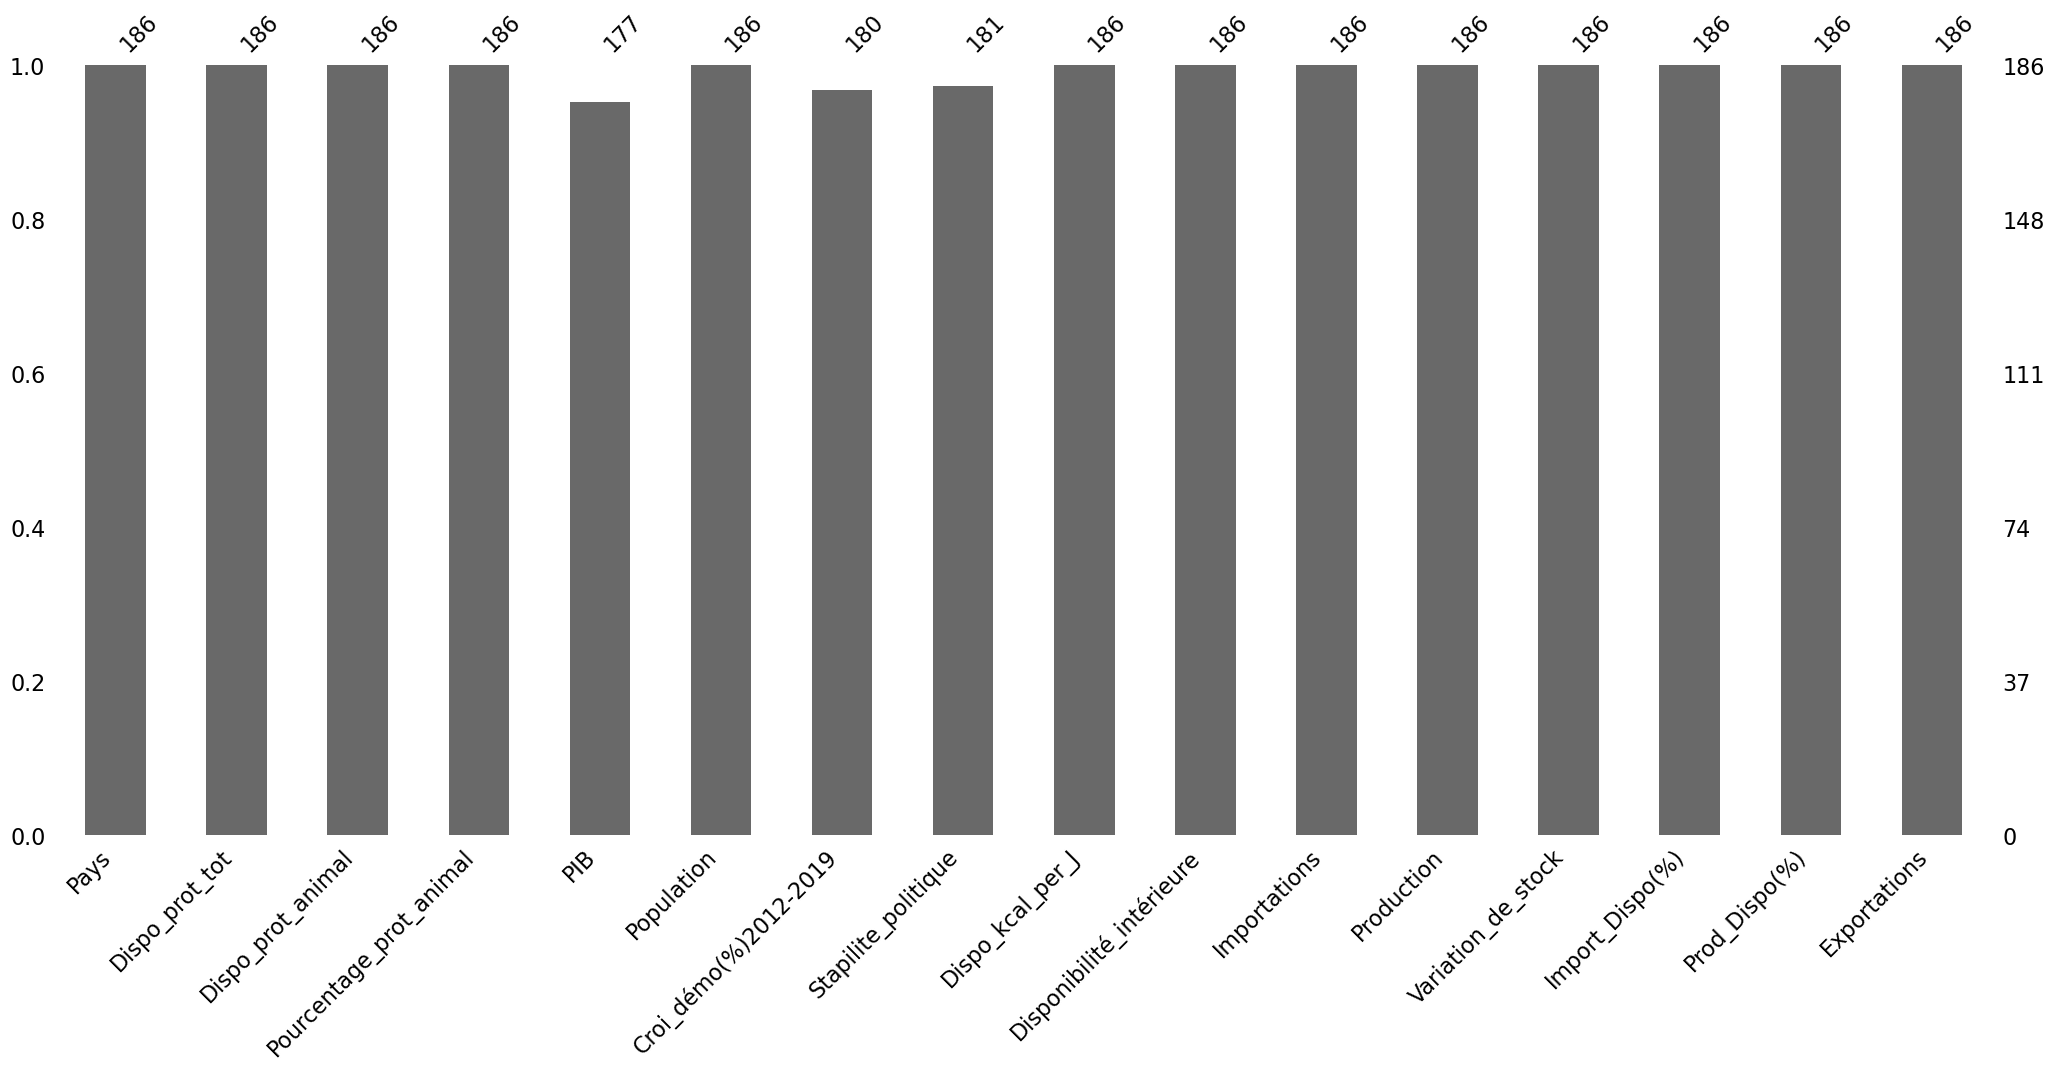

In [248]:
msno.bar(BDD_P9_final)

In [90]:
BDD_P9_final.loc[BDD_P9_final['Prod_Dispo(%)'].isnull()==True]

Empty DataFrame
Columns: [Pays, Dispo_prot_tot, Dispo_prot_animal, Pourcentage_prot_animal, PIB, Population, Croi_démo(%)2012-2019, Stapilite_politique, Dispo_kcal_per_J, Disponibilité_intérieure, Exportations, Importations, Production, Variation_de_stock, Import_Dispo(%), Prod_Dispo(%)]
Index: []

In [76]:
BDD_P9_final['Production'] = BDD_P9_final['Production'].fillna(0)

In [77]:
BDD_P9_final.loc[BDD_P9_final['Production'].isnull()==True]

Empty DataFrame
Columns: [Pays, Dispo_prot_tot, Dispo_prot_animal, Pourcentage_prot_animal, PIB, Population, Croi_démo(%)2012-2019, Stapilite_politique, Dispo_kcal_per_J, Disponibilité_intérieure, Exportations, Importations, Production, Variation_de_stock, Import_Dispo(%), Prod_Dispo(%)]
Index: []

In [250]:
BDD_P9_final.to_csv("RESULTATS/BDD_P9_final_07mars.csv", index=False,encoding='utf-8-sig')